In [1]:
from mss import mss
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.backends.cudnn as cudnn
from tensorflow.keras.utils import to_categorical
from PIL import Image
from sklearn.neighbors import NearestNeighbors as KNN
#import pyautogui
import keyboard
import mouse
import pytesseract
from time import sleep
import winsound
from re import sub

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cudnn.benchmark = True

In [11]:
# Memory efficient loop

with mss() as sct:
    #filename = sct.shot()
    monitor = {"top": 40, "left": 0, "width": 800, "height": 640} # Memory efficiency.
    data = sct.grab(monitor)
    data = Image.frombytes("RGB", data.size, data.bgra, 'raw', 'BGRX')
    data = data.convert("P")
    data = np.array(data)
    #data = torch.from_numpy(data)

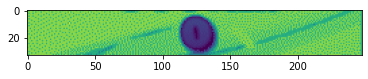

In [31]:
sleep(3)

#"Score": (180, 1, 213, 249)

with mss() as sct:
    monitor = {"top": 180, "left": 1, "width": 249-1, "height": 213-180} # Memory efficiency.
    data = sct.grab(monitor)
    data = Image.frombytes("RGB", data.size, data.bgra, 'raw', 'BGRX')
    data = data.convert("P")
    data = np.array(data)

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME)

plt.imshow(data)
plt.show()

consequence = pytesseract.image_to_string(data, config='--psm 6')
print(consequence)

consequence = sub('[^A-Za-z0-9\/\.]', '', consequence)

print(consequence)

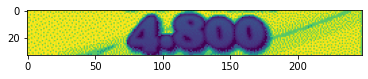

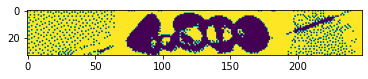

In [36]:
# Testing Screen region capture and OCR

from cv2 import adaptiveThreshold, ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY

sleep(3)

with mss() as sct:
    monitor = {"top": 180, "left": 1, "width": 249-1, "height": 213-180} # Memory efficiency.
    data = sct.grab(monitor)
    data = Image.frombytes("RGB", data.size, data.bgra, 'raw', 'BGRX')
    data = data.convert("P")
    data = np.array(data)

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME)

plt.imshow(data)
plt.show()

consequence = pytesseract.image_to_string(data, config='--psm 6')
print(consequence)

consequence = sub('[^A-Za-z0-9\/\.]', '', consequence)

print(consequence)

datathresh = adaptiveThreshold(data,255,ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY,63,20)

consequence = pytesseract.image_to_string(datathresh, config='--psm 6')
print(consequence)

#replace w --> 1, f --> / ---> y ---> 1 ---> e --> 2
consequence = sub('[^A-Za-z0-9\/\.]', '', consequence)

print(consequence)

plt.imshow(datathresh)
plt.show()

| 45800.

45800.


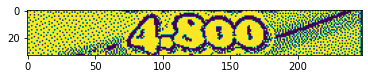

In [75]:
datathresh = adaptiveThreshold(data,255,ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY,11,5) # 11, 5

consequence = pytesseract.image_to_string(datathresh, config='--psm 8')
print(consequence)

#replace w --> 1, f --> / ---> y ---> 1 ---> e --> 2
consequence = sub('[^A-Za-z0-9\/\.]', '', consequence)

print(consequence)

plt.imshow(datathresh)
plt.show()

In [34]:
from cv2 import adaptiveThreshold, ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY

thresh = adaptiveThreshold(data,255,ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY,171,13)

plt.imshow(thresh)
plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


In [20]:
print(data.shape) # (Height, Width, Channels)

(640, 800, 4)


In [ ]:
# Creating a single dictionary for every single possible command causes us to deal with too many data at once
# A simple game which uses the mouse extensively, like Bullet Heaven 2, can have around 6 million itens in its input mapping dict.
# We had a similar problem in SerpentAI...and we'll solve this in the same way as we did with Serpent...or quite.

# In Serpent for Bullet Heaven, we made the agent get, first, the coordinate X where it would move the mouse and, then, another iteration to get Y.
# We could do a similar thing with Hakisa, but, instead of making another entire iteration,
# we could simply use a Linear Layer which would generate 2 outputs. Embeddings could also be an option, but I don't see any advantage here.

# In this paper https://arxiv.org/pdf/2209.11553.pdf , in MiniAlphaStar, they categorize each eaction between types and, in Supervised Learning stage,
# they pass those types into a Cross Entropy Function. They also use AutoRegressive Embedding...which I don't know exactly how we can do it.

# Using this same idea, we could classify our commands into keyboard press command, keyboard up command, move(mouse) command, click command and right click command, etc.
# and also classify the actions, which would be the keys to be pressed and the window coordinates.

# Hakisa would have to correctly predict the command type she must use and, given the predicted command type, predict the action she must perform.
# So, Hakisa will now have 3 outputs: command type, action1, action2, where:
# command type: keyboard, move(mouse), click, right click
# action1: keyUp, keyDown, press(keyboard), X(mouse)
# action2: 'a', 'z', 'shift'(keyboard), Y(mouse)

# Since command type will have a small dimension, Cross Entropy will be no problem.

# As for Embedding Layers: they could be used to relate a command to a specific context, given by the input frame.
# Embedding Layers take an input with N_possibilities size, and outputs a vector which can have 1 dimension, 2, 3...
# In NLP, N_possibilities is the size of our vocabulary, and the vector will determine the location of that input in the vector matrix.
# Usually, in NLP, vector have the same size as the context. When analyzing 3 words, vector will have 3 dimensions.
# Since Hakisa is basically a Feature Extractor net, the context can be the result of such extraction.
# Image frame(input) ------------> Features ----------> Embedding ----> Context ---------> Output.
# Simpler games will have fewer features and fewer possibilities of context, while those more complex will have more possible contexts.
# Ex: Jigoku Kisetsukan = beginning of level and no enemies, window full of projectiles, being hit... //
# Starcraft 2 = Resources lacking and have to collect, need reconaissance, being attacked, plan an attack, counterattack...
# However, an Embedding layer will only accept encoded inputs(in Pytorch, index-encoded), so only integers. So use torch.round()
# This could also cause the problem that features that are subtly different will be treated as equal. Maybe backpropagation can change this with time?


# The new Study loss would now be: Cross Entropy Loss between command types + MSELoss action1 + MSELoss action 2

# With those modifications, an input map which had 6 million itens will now be distributed between 3 input maps with 3, 1920 and 1080 items respectively.
# The number of possible commands is still 6 million, but now those possibilities are somehow "chunked". We don't have a single dictionary with 6 million items anymore.
# and now will be much easier for Hakisa to get the correct value for a dict with scaled values, generating
# a wider range of outputs during exploration and maybe helping in the Play Mode.
# It'll also be easier to fit KNN into dictionaries, avoiding the necessity of using PaperSpace or Google Colabs just to fit KNN and download it.

# Since we'll use cross entropy for command types, we don't need to convert it to a dictionary. Thus, KNN can be discarded here.

When encoding to vector, it might be useful to use a separate model that will vectorizer the input mappings according to the current game state,
that is, a model that will extract features on the input frames, concatenate it into the one-hot encoded input mapping and pass it through 1 or 2 linear layers to
generate our vector.

However, this might only be useful when we're dealing with ready-made data, that is: input frames that are correctly attached to the "correct" input mappings(both will be used as inputs).
If we don't have that data available, Hakisa will generate random input mappings, which means the input frames(the context) will be attached to wrong responses.

Since vectorization is usually more related to NLP, I suppose that we could compare this situation to training a vectorizer model on phrases that makes no sense. If the vectorizer receives the sentence "School bright keyboard Europe", it'll make the mistake of relating "school" to "bright", which is nonsense. This would be the case if we train a vectorizer model on Hakisa's random input mappings.

However, if we have a ready-made data, which could be the sentence "At school, we had computing class, but my computer keyboard was broken", our vectorizer would correctly relate the word "keyboard" to "computer", or "broken". It could relate "keyboard" to "school", but it'll also relate it to "computing" and "class".
I presume this would be the case if we used a ready made data where in the state A, the command must be "Jump".

Also, in the beginning, I was dealing with vectors with a single dimension. This might not be effective, depending on how many types of actions you have.

If we're playing Jigoku Kisetsukan, which has just keyboard actions and movement and combat actions, we could think of our embedding matrix as being just a single x-axis,
where the right side stores movement actions, and the left stores combat actions. Positive actions = movement; Negative actions = combat.
However, if we're playing, for example, Dark Souls 3, we'll have mouse actions and keyboard actions, and some mouse actions aren't related directly to combat
(healing, applying magical buffs), while some keyboard actions are also related to combat(strong attack, estus?). Some commands even would require a combination of a mouse
command and a keyboard command(strong attacks = shift + click). In this case, we would need an embedding matrix with much more axis, more dimensions. An axis could be 
the combat actions for mouse, another would be the combat actions for keyboard, a third would be the mix of both keyboard and mouse, etc.

In [3]:
class Dataset(torch.utils.data.Dataset):
    '''
    Generates input maps and commands for Hakisa.

    Remember: command_types = list of strings, actions1 and 2 = list of strings(keyboard), X coordinates or None(mouse)
    '''
    
    def __init__(
        self,
        command_types = None,
        actions1 = None,
        actions2 = None,
        explore_train_steps=1000,
        memory_size=100,
        top=0,
        left=0,
        width=1920,
        height=1080,
        resize=None
    ):

        # Window resolutions for the screen grabber
        self.top = top
        self.left = left
        self.width = width
        self.height = height

        self.resize = resize # For reducing the images. Must be a tuple (Height, Width)

        self.steps = explore_train_steps

        self.data = None # This will be created during training. However, it's possible to load a ready-made data for training.

        # Initially, we'll be using lists. After our vector embedding has been properly trained, we'll create a dictionary
        # of input mappings with it.

        self.command_type = command_types
        self.actions1 = actions1
        self.actions2 = actions2

        self.encoded_command_type = to_categorical(np.arange(0, len(command_types)), len(command_types))
        self.encoded_command_type = torch.from_numpy(self.encoded_command_type) # Will be used by Hakisa, as it can be used with softmax without generating big outputs.
        
        #self.encoded_actions1 = self._encode4vec(actions1) # Will be used to train the vector embedding.
        #self.encoded_actions2 = self._encode4vec(actions2)

        self.key_actions1 = None # Vectors for each action1
        self.key_actions2 = None # Vectors for each action2
        # command_type doesn't need a vector library, as it can be used with softmax in Hakisa without generating big outputs.

        #self.command_type = command_types
        #self.actions1 = self._create_commands_dictionary(input_maps=actions1)
        #self.actions2 = self._create_commands_dictionary(input_maps=actions2)

        self.knn_actions1 = None # Where we'll store our fitted KNN
        self.knn_actions2 = None

        #self.knn_actions1 = self._fit_knn(self.actions1)
        #print("KNN fitted in actions 1")
        #self.knn_actions2 = self._fit_knn(self.actions2)
        #print("KNN fitted in actions 2\nAll action maps have been properly fitted by their respective KNN algorithm")

        #self.key_actions1 = actions1 # For efficiency in each step
        #self.key_actions2 = actions2

        self.labels = None # Used for studying
        self.rewards = None # Also used for studying.

        self.memory_size = memory_size
        self.memory = []


    # Pytorch's Dataset functions will only be used in Studying mode
    def __getitem__(self, idx):

        inputs = self.data[idx]
        encoded_command_type = self.encoded_command_type[idx]
        encoded_actions1 = self.encoded_actions1[idx]
        encoded_actions2 = self.encoded_actions2[idx]
        #labels = self.labels[idx]
        #rewards = self.rewards[idx]

        #return encoded_actions, inputs, labels, rewards
        return inputs, encoded_command_type, encoded_actions1, encoded_actions2


    def __len__(self):

        return len(self.data)


    def _grab_frame(self):
        # Unfortunately, this whole operation takes about 0.6 seconds, so we'll probably have to deal with a single frame each 1~3 seconds.
        with mss() as sct:
            frame = sct.grab(monitor={"top": self.top, "left": self.left, "width": self.width, "height": self.height})
            frame = Image.frombytes("RGB", frame.size, frame.bgra, 'raw', 'BGRX')

            if self.resize:
                frame = frame.resize(self.resize)

            frame = np.array(frame, dtype=np.float32)

            frame = torch.from_numpy(frame)
        
        frame = frame.view(1, frame.size(2), frame.size(0), frame.size(1)).to(device) # (Batch, Channels, Height, Width)

        return frame

    def create_commands_dictionary(self, map2vec_model):

        map2vec_model.evaluate = True

        # I don't really know how we could handle vector dimensions

        dictionary_actions1 = {}
        dictionary_actions2 = {}

        empty1 = torch.empty_like(self.encoded_actions1, device=device) # The vectorizer demands both actions as input, but they're vectorized independently.
        empty2 = torch.empty_like(self.encoded_actions2, device=device)

        empty_frame = torch.empty((1, 400*5*5), device=device) # The vectorizer requires a context as input, but for evaluation this isn't necessary.

        empty_type = torch.empty_like(self.encoded_command_type, device=device)

        for i in range(len(self.actions1)):

            with torch.no_grad():

                output, _ = map2vec_model(empty_frame, empty_type[0].unsqueeze(0), self.encoded_actions1[i].unsqueeze(0), empty2[0].unsqueeze(0))

                output = output.view(-1)

                vector = output[torch.argmax(output)].item()
            
            dictionary_actions1[self.actions1[i]] = vector

        self.key_actions1 = dictionary_actions1

        del dictionary_actions1

        for i in range(len(self.actions2)):

            with torch.no_grad():

                _, output = map2vec_model(empty_frame, empty_type[0].unsqueeze(0), empty1[0].unsqueeze(0), self.encoded_actions2[i].unsqueeze(0))

                output = output.view(-1)

                vector = output[torch.argmax(output)].item()

            dictionary_actions2[self.actions2[i]] = vector

        self.key_actions2 = dictionary_actions2

        del dictionary_actions2

        print(f"Dict input maps created successfully!\nActions 1 dict length: {len(self.key_actions1)}\nActions 2 dict length: {len(self.key_actions2)}")

        self.knn_actions1 = self._fit_knn(self.key_actions1)
        self.knn_actions2 = self._fit_knn(self.key_actions2)

        print("All action maps have been properly fitted by their respective KNN algorithm")

    def _fit_knn(self, dictionary):
        
        values = list(dictionary.values())

        values = np.array(values).reshape(-1,1)

        knn = KNN(n_neighbors=1, algorithm='kd_tree').fit(values)

        del values

        return knn
        

    def get_command(self, cmd_type, action1, action2, exploration=False):
        '''
        Hakisa's output: (command_type, action1, action2) ----> (key, Down, z) or (click, 100, 60)
        command_type is the argmax output from a logsoftmax function and will be used as index for its respective list.
        action1 and action 2 are both floats and will be passed through KNN in order to get the proper command.
        '''

        if exploration:

            cmd_type = self.command_type[cmd_type.item()]
            action1 = self.actions1[action1.item()]
            action2 = self.actions2[action2.item()]

            command = (cmd_type, action1, action2)

            return command

        if cmd_type.ndim > 1:

            cmd_type = np.argmax(cmd_type, 1).item()
        
        else:
            cmd_type = cmd_type.astype(int).item()

        cmd_type = self.command_type[cmd_type]

        _, index = self.knn_actions1.kneighbors(action1)

        for subarray in index:
            for i in subarray:
                action1 = self.actions1[i]

        _, index = self.knn_actions2.kneighbors(action2)

        for subarray in index:
            for i in subarray:
                action2 = self.actions2[i]
        
        del index, subarray, i

        command = (cmd_type, action1, action2)

        del cmd_type, action1, action2

        return command

    def get_consequences(self, top, left, width, height, togray=False, threshold=False, thresh_gauss=171, thresh_C=13, tesseract_config='--psm 8'):
        '''
        Used after Hakisa performed an input, in order to get its consequences(ex: score change, bombs, kills, deaths...).
        Returns a string according to Tesseract's OCR.
        '''

        with mss() as sct:
            consequence = sct.grab(monitor={"top": top, "left": left, "width": width, "height": height})

            consequence = Image.frombytes("RGB", consequence.size, consequence.bgra, 'raw', 'BGRX')

        if togray is True:

            consequence = consequence.convert("P") # Sometimes, simply converting to grayscale is enough

            if threshold is True:
                if "ADAPTIVE_THRESH_GAUSSIAN_C" and "adaptiveThreshold" and "THRESH_BINARY" not in dir():
                    from cv2 import adaptiveThreshold, ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY

                consequence = adaptiveThreshold(np.array(consequence),255,ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY,thresh_gauss,thresh_C)
                consequence = Image.fromarray(consequence)
        
        consequence = pytesseract.image_to_string(consequence, config=tesseract_config) 

        # OCR adds some strange characters(even with the whitelist function). Let's remove them.

        consequence = sub('[^A-Za-z0-9/.]', '', consequence) # Attention: 0, 1 and 8 can be seen as O, l and B.

        return consequence

    def create_memory(self, frame, keys, values, reward):
        '''
        Saves data in the memory list.
        Memory is saved in the format (frame, (command_type, action1_key, action2_key), (command_index, action1_value, action2_value), reward)

        During study mode, frame will be used as input during training. The tuple of values and reward, as labels.
        The tuple of keys is used for visualization, and reward also works as weights(helps discarding bad decisions and saving good ones).
        
        Use cumulative rewards.

        Memory will only be changed once it reaches its full size.
        '''

        reward = reward # Beta can be a constant value, like 1e-5. This just to avoid big numbers.


        memory = (frame, keys, values, reward) # A tuple makes each item in the list iterable...and its easier to visualize than lists of lists.


        if len(self.memory) < self.memory_size:

            self.memory.append(memory)
        
        else:
            self.memory = sorted(self.memory, key=lambda x: x[3]) # Sorting list according to rewards values.
            self.memory.pop(0) # Removing the item with lowest reward value
            
            self.memory.append(memory)
        
        del memory

    def create_data_for_study(self):

        # Creating dataset for studying

        inputs = [i[0].cpu() for i in self.memory] # game frames. Using cpu to avoid CudaMemory errors.
        labels = [i[2] for i in self.memory] # (command_type index, action1 value, action2 value)
        actions1 = [i[1][1] for i in self.memory] # action1 key for one-hot encoding
        actions2 = [i[1][2] for i in self.memory] # action2 key
        rewards = [i[3] for i in self.memory] # Reward got in that step.

        inputs = torch.cat(inputs, 0)

        labels = np.stack(labels, 0).astype(np.float32) # Now converting to float here to avoid numpy.dtype == object
        encoded_actions1 = to_categorical(np.arange(0, len(actions1)), len(self.actions1))
        encoded_actions2 = to_categorical(np.arange(0, len(actions2)), len(self.actions2))
        rewards = np.stack(rewards, 0).astype(np.float32)

        labels = torch.from_numpy(labels)
        encoded_actions1 = torch.from_numpy(encoded_actions1)
        encoded_actions2 = torch.from_numpy(encoded_actions2)
        rewards = torch.from_numpy(rewards)

        self.data = inputs
        self.labels = labels.to(device)
        self.encoded_actions1 = encoded_actions1.to(device)
        self.encoded_actions2 = encoded_actions2.to(device)
        self.rewards = rewards.to(device)

        del inputs, labels, rewards

    def record_gameplay(self, number_of_screenshots, screenshot_delay, grayscale=False, resize=False, path=None):

        # Resizing and grayscaling isn't really necessary here, but can save you some time later.
        # Both saving you from writing more code and from making your hardware having to process more and more data at once.

        print(f"Ok. Screenshot capture will begin in 5 seconds")

        sleep(5)

        winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME) # Just to know if everything's ok

        for i in range(number_of_screenshots):

            with mss() as sct:

                frame = sct.grab(monitor={"top": self.top, "left": self.left, "width": self.width, "height": self.height})
                frame = Image.frombytes("RGB", frame.size, frame.bgra, 'raw', 'BGRX')

            if grayscale:

                frame = frame.convert('L')

            if resize:

                frame = frame.resize(self.resize)

            frame.save(f"{path}/{i+2000}.png")

            sleep(screenshot_delay)
        
        print("Screenshot capture finished!")

        winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME)


    def use_readymade_data(self, data, commands):
        '''
        data: a tensor of size (N_Samples, Channels, Height, Width) containing the game frames. The pixels values must be within range [0., 255.].
        commands: a list of tuples with length (N_samples), with each sample being a tuple composed of (command_type, action1, action2), where:

            command_type: a tensor the action command type index-encoded with indices within range [0, len(command_types)].
            action1: the action1 index-encoded with indices within range [0, len(actions1)].
            action2: the action2 index-encoded with indices within range [0, len(action2)].
        '''

        # We aren't using data in time_steps mode, like we do for gifs, time series and forecasting in general.
        # I thought it might be a good idea to also train Hakisa with that.
        # This might also be the best way to train her in frames forecasting, as the process is probably too slow to be made while playing.

        self.data = data

        encoded_command_type = []
        encoded_actions1 = []
        encoded_actions2 = []

        for sample in commands:

            command_type = to_categorical(sample[0], len(self.command_type))
            command_type = torch.from_numpy(command_type)
            command_type = command_type.unsqueeze(0).to(device) # So you don't have to use [number] for your commands tuple to get a command_type with shape [N_samples, 1]
            encoded_command_type.append(command_type)

            encoded_action1 = to_categorical(sample[1], len(self.actions1))
            encoded_action1 = torch.from_numpy(encoded_action1)
            encoded_action1 = encoded_action1.unsqueeze(0).to(device)
            encoded_actions1.append(encoded_action1)

            encoded_action2 = to_categorical(sample[2], len(self.actions2))
            encoded_action2 = torch.from_numpy(encoded_action2)
            encoded_action2 = encoded_action2.unsqueeze(0).to(device)
            encoded_actions2.append(encoded_action2)

        encoded_command_type = torch.cat(encoded_command_type, 0)
        encoded_actions1 = torch.cat(encoded_actions1, 0)
        encoded_actions2 = torch.cat(encoded_actions2, 0)

        #encoded_commands = np.stack(encoded_commands, 0).astype(np.int32) # (N_samples)

        #encoded_commands = torch.from_numpy(encoded_commands)
        #encoded_commands = encoded_commands.to(device)

        #self.encoded_commands = encoded_commands

        self.encoded_command_type = encoded_command_type
        self.encoded_actions1 = encoded_actions1
        self.encoded_actions2 = encoded_actions2

        print("All done! Train the vectorizer and then use it to generate the input mapping dictionary")


    def save_memory(self, memory_name):

        import pickle

        with open(f'Hakisa_memory_{memory_name}.pkl', 'wb') as f:
            pickle.dump(self.memory, f)
        
        print(f"Memory saved! You can load it again with")
        print(f"open('Hakisa_memory_{memory_name}.pkl', 'rb') as f:\n\tdataset.memory = pickle.load(f)")
        print("Don't forget to close the file!")

        f.close()


In [16]:
def conv2out(input, kernel, stride, padding):
    x = 2*padding
    y = 1*(kernel-1)
    z = (input + x - y - 1)/stride

    output = z + 1
    return output

In [19]:
print(conv2out(200, 3, 1, 1))

200.0


In [ ]:
print(conv2out(160, 2, 2, 0))

In [93]:
# Fazer Hakisa prever não apenas o comando que ela deve realizar, mas também prever a recompensa daquela ação (Actor-critic) --> Study e Gameplay
# Talvez seja interessante tentar prever os features do próximo estado, também, mas isso será muito pesado.
# Também pode ser útil prever se a ação foi boa(1), neutra(0) ou ruim(-1) ---> com base na recompensa ou no output?
# Usar recompensas como input? Recompensa condiciona output ----> concatenação ou linear neuron paralelo?


# quanto menor for o valor da recompensa prevista em relação à recompensa real, menor o gradiente de backpropagation (MSE Loss) ----> Gameplay mode
# Mas, como fazer o agente buscar a maior recompensa, em vez de apenas prever a próxima recompensa? A Hakisa poderia apenas
# prever recompensa 0 e se esforçar para que a recompensa seja 0.

# Probabilidade de a ação ser boa, neutra ou ruim ---> quanto menor o erro na previsão, menor o gradiente.
# Porém, o que a impediria de realizar ações ruins ou neutras de modo a acertar na sua previsão?

# Ação boa = recompensa maior. Se Hakisa prever que a ação foi boa, ela vai prever uma recompensa positiva ou maior.
# Com isso, a recompensa prevista é diretamente atrelada à probabilidade de a ação ter sido boa.
# Logo, se ela prevê uma ação ruim, mas uma recompensa alta = maior loss --> backpropagation.
# Porém, se ela prevê uma ação boa, mas uma recompensa baixa = maior loss --> backpropagation
# Mas e se a ação é boa, mas a recompensa de fato não é alta?

# RECOMPENSA CUMULATIVA: Hakisa deve prever qual é o valor atual da recompensa(cumulativa) ---> Usar fator de desconto/incerteza(nosso beta) TD-LEARNING
# Hakisa deve prever qual será o valor da recompensa obtida ----> Recompensa será extraída no próximo estado (backpropagation no próximo estado apenas)
# Ação ruim, mas prevê recompensa alta = maior loss
# Ação boa, mas recompensa baixa = maior loss
# Ação boa, recompensa alta = menor loss (ok)
# Mas e se ela prevê uma ação ruim, recompensa ruim e se sabota para ter uma recompensa baixa?

# Hakisa vai classificar a ação que ela decidiu tomar como sendo boa, neutra ou ruim ---> softmax (probabilidade de ser ruim, neutra ou boa)
# Isso usando como base a ação tomada, apenas.
# No próximo estado, ela receberá a ação tomada anteriormente e irá reclassificá-la como boa, neutra ou ruim ---> softmax
# Isso usando como base a recompensa obtida

# O valor de uma ação deve condicionar o valor da próxima ação ---> concatenação? Soma de inputs?
# Usar valores da ação anterior como input da Hakisa
# Ação ruim, neutra ou boa -----> Classificação da ação anterior para, então, obter a próxima ação?

# LOSS: RECOMPENSA PREVISTA - RECOMPENSA ATUAL² (MSE LOSS)

# Possível instabilidade devido a constante optimização -----> otimização a cada X steps?


In [ ]:
'''
NEW ARCHITECTURE!

Hakisa will now receive many inputs and generate many outputs, but not as much as traditional algorithms:
    Input A: Game Frame (state) -------> Feature Extraction --------> command type, action1, action2(output A) -----> Probability of being a good decision + Predicted Reward
    Input B: Previous action output -------> was that a good decision? -----> added to the main network
    Input C: Previous Reward --------------> Added to the network


Input A will be the "main input", while B and C will be conditioners, being concatenated into input A.
Input B will pass through a small preprocessing net in order to classify such action, being concatenated right after that.

Outputs:

    Output A: (command_type, action1, action2)
    Output B: Tensor of size (Batch, 3), classifying probability of Output A being bad(0), neutral(1) or good(2)
    Output C: Tensor of size (Batch, 1), predicting the reward to be obtained for that step. Will be multiplied by an uncertainty factor between 0 and 1.[TD-Learning+Actor Critic]


Exploration Mode

    Now Hakisa will simply select random action values rather than passing them through her network.

    This mode won't use output B nor C.

Study Mode

    Each iteration using frames and actions will generate output C.
    Output C is the reward predicted, which will have, as label, the reward stored in memory.

    Using more loss functions:

        command_type will pass through a NLLLoss ----> command_loss = NLLLoss(predicted_command, command_label)
        action1 and action2 will pass, each, through a MSELoss.
        predicted reward and actual reward will be passed through a MSELoss ---> reward_loss = MSELoss(predicted_reward, actual_reward)

        The Study Loss will be the sum of all those losses.

Play Mode
    Discarding custom GameplayLoss.

    Now, the outputs from one iteration will serve as labels to outputs from previous iteration.

        Output B and C from iteration 5 will serve as labels for Outputs B and C from iteration 4.

    Using more common losses:

        action_quality_loss = NLLLoss(previous_outputB, current_outputB)
        reward_loss = MSELoss(predicted_reward, actual_reward)

        gameplay_loss = action_quality_loss + reward_loss

    Backpropagation will occur after N steps, not after every step ----> avoid instability issues.

'''

In [4]:
class Hakisa(torch.nn.Module):
    '''
    Hakisa itself.

    She has 2 ways of acting, according to her current mode:

        if mode = 'Explore', her inputs can be None, and will generate a random integer according to the input mapping, playing randomly.

        if mode = 'Study', she'll receive game frames as inputs, extract the most relevant features and,
        in the end, will generate 2 outputs:

            output 1: a tuple of commands (command_type, action1, action2). Sizes (Batch, 1)
            output 2: prediction of the reward to be obtained through that action. Size (Batch, 1)

        if mode = 'Play', she'll receive game frames, previous commands, previous reward and previous action quality, generating:

            output 1: a tuple of commands (command_type, action1, action2). Sizes (Batch, 1)
            output 2: prediction of the reward to be obtained through that action. Size (Batch, 1)
            output 3: a prediction of how good her action was(0 = bad, 1 = ok, 2 = good).
    '''

    def __init__(self, command_types, actions1, actions2, mode='Explore'):

        super(Hakisa, self).__init__()

        self.mode = mode

        self.n_command_types = len(command_types) # For initialization, the lengths is what actually matters.
        self.actions1 = len(actions1)
        self.actions2 = len(actions2) # just for exploration mode

        # This structure must be changed with the input size...unless you'd like to use adaptive pooling

        # Let's begin supposing that we're gonna use 200x200 RGB images ---> (3, 200, 200)

        # 200x200

        self.conv1 = torch.nn.Conv2d(3, 100, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm1 = torch.nn.BatchNorm2d(100)
        self.conv2 = torch.nn.Conv2d(100, 100, kernel_size=3, stride=1, padding=1, bias=False) # 200x200
        self.batchnorm2 = torch.nn.BatchNorm2d(100)
        self.pool2x2 = torch.nn.MaxPool2d(kernel_size=2, stride=2) # 100x100
        self.conv3 = torch.nn.Conv2d(100, 200, kernel_size=3, stride=1, padding=1, bias=False) # 100x100
        self.batchnorm3 = torch.nn.BatchNorm2d(200)
        self.conv4 = torch.nn.Conv2d(200, 400, kernel_size=3, stride=1, padding=1, bias=False) # 100x100
        self.batchnorm4 = torch.nn.BatchNorm2d(400)
        # Add pool 2x2 ---> 50x50
        self.conv5 = torch.nn.Conv2d(400, 800, kernel_size=3, stride=1, padding=1, bias=False) # 50x50
        self.batchnorm5 = torch.nn.BatchNorm2d(800)
        self.conv6 = torch.nn.Conv2d(800, 1000, kernel_size=3, stride=1, padding=1, bias=False) # 50x50
        self.batchnorm6 = torch.nn.BatchNorm2d(1000)
        # Add pool 2x2 ---> 25x25
        self.conv7 = torch.nn.Conv2d(1000, 1000, kernel_size=4, stride=1, bias=False) # 22x22
        self.batchnorm7 = torch.nn.BatchNorm2d(1000)
        self.conv8 = torch.nn.Conv2d(1000, 1000, kernel_size=3, stride=1, bias=False) # 20x20
        self.batchnorm8 = torch.nn.BatchNorm2d(1000)
        # Add pool 2x2 ---> 10x10
        self.conv9 = torch.nn.Conv2d(1000, 800, kernel_size=3, stride=1, padding=1, bias=False) # 10x10
        self.batchnorm9 = torch.nn.BatchNorm2d(800)
        self.conv10 = torch.nn.Conv2d(800, 400, kernel_size=3, stride=1, padding=1, bias=False) # 10x10
        self.batchnorm10 = torch.nn.BatchNorm2d(400)
        # Add pool 2x2 ---> 5x5
        self.neuron1 = torch.nn.Linear(400*5*5, 200*2*2, bias=False)
        self.layer_norm1 = torch.nn.LayerNorm(200*2*2)

        if self.n_command_types > 1:

            self.neuron_command_study = torch.nn.Linear(200*2*2, self.n_command_types, bias=False)
            self.neuron_command_play = torch.nn.Linear(1200, self.n_command_types, bias=False)

            # Considering the command_type that has been predicted, what should be the action1 and action2?

            self.neuron2 = torch.nn.Linear(self.n_command_types, 100*2*2, bias=False)

        else:
        
            self.neuron2_study = torch.nn.Linear(200*2*2, 100*2*2, bias=False)
            self.neuron2_play = torch.nn.Linear(1200, 100*2*2, bias=False)

        self.neuron_quality = torch.nn.Linear(3, 200, bias=False)

        self.layer_norm2 = torch.nn.LayerNorm(100*2*2)
        self.neuron_action1 = torch.nn.Linear(100*2*2, 1, bias=False)
        self.neuron_action2 = torch.nn.Linear(100*2*2, 1, bias=False)

        self.neuron_reward = torch.nn.Linear(1, 200, bias=False)
        self.layer_normcat = torch.nn.LayerNorm(1200)
        self.neuron_predquality = torch.nn.Linear(2+self.n_command_types, 3, bias=False)
        self.neuron_predreward1 = torch.nn.Linear(2+self.n_command_types, 1000, bias=False)
        self.neuron_predreward2 = torch.nn.Linear(1000, 1, bias=False)

        self.PRelu = torch.nn.PReLU(1)

        self.softmax = torch.nn.LogSoftmax(-1) # Since we're using softmax here, use NLLLoss during study and play mode.
    

    def forward(self, input=None, frame_sequence=None, previous_action=None, previous_reward=None):

        if self.mode == "Explore":
            # Reinventing the wheel didn't work. Now, in exploration mode, Hakisa will simply generate random numbers.
            
            command_type = torch.randint(0, self.n_command_types, size=(1,), device=device)

            # Remember that, in exploration mode, we'll be generating data for our vectorizer model, so we'll be dealing exclusively with
            # integers(indices for our input mapping lists)

            action1 = torch.randint(0, self.actions1, size=(1,), device=device)
            action2 = torch.randint(0, self.actions2, size=(1,), device=device)
                
            #action1 = torch.normal(0, max(dataset.actions1.values()), size=(1, 1), device=device)
            #action2 = torch.normal(0, max(dataset.actions2.values()), size=(1, 1), device=device)

            return (command_type, action1, action2)


        elif self.mode == 'Study':

            x = self.conv1(input)
            x = self.batchnorm1(x)
            x = self.PRelu(x)
            x = self.conv2(x)
            x = self.batchnorm2(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv3(x)
            x = self.batchnorm3(x)
            x = self.PRelu(x)
            x = self.conv4(x)
            x = self.batchnorm4(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv5(x)
            x = self.batchnorm5(x)
            x = self.PRelu(x)
            x = self.conv6(x)
            x = self.batchnorm6(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv7(x)
            x = self.batchnorm7(x)
            x = self.PRelu(x)
            x = self.conv8(x)
            x = self.batchnorm8(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv9(x)
            x = self.batchnorm9(x)
            x = self.PRelu(x)
            x = self.conv10(x)
            x = self.batchnorm10(x)
            x = self.PRelu(x)
            
            x = self.pool2x2(x)

            x = x.view(x.size(0), -1) # (batch, 400*5*5)

            x = self.neuron1(x) # (batch, 200*2*2)
            x = self.layer_norm1(x)
            x = self.PRelu(x)

            if self.n_command_types > 1:

                command_type = self.neuron_command_study(x)
                command_type = self.softmax(command_type) # (Batch, n_commands)

                x = self.neuron2(command_type)

            else:
                command_type = torch.ones((input.size(0), 1), device=device)

                x = self.neuron2_study(x)

            x = self.layer_norm2(x)
            x = self.PRelu(x)

            action1 = self.neuron_action1(x) # (Batch, 1)
            action2 = self.neuron_action2(x) # (Batch, 1)

            x = torch.cat((command_type.detach(), action1.detach(), action2.detach()), 1) # (Batch, 1+1+n_commands)
            # Using .detach() for concatenation to prevent reward prediction backpropagation from interferring on actions prediction

            x = self.neuron_predreward1(x)
            predicted_reward = self.neuron_predreward2(x)

            del x

            return (command_type, action1, action2), predicted_reward

        else:

            x = self.conv1(input)
            x = self.batchnorm1(x)
            x = self.PRelu(x)
            x = self.conv2(x)
            x = self.batchnorm2(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv3(x)
            x = self.batchnorm3(x)
            x = self.PRelu(x)
            x = self.conv4(x)
            x = self.batchnorm4(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv5(x)
            x = self.batchnorm5(x)
            x = self.PRelu(x)
            x = self.conv6(x)
            x = self.batchnorm6(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv7(x)
            x = self.batchnorm7(x)
            x = self.PRelu(x)
            x = self.conv8(x)
            x = self.batchnorm8(x)
            x = self.PRelu(x)

            x = self.pool2x2(x)

            x = self.conv9(x)
            x = self.batchnorm9(x)
            x = self.PRelu(x)
            x = self.conv10(x)
            x = self.batchnorm10(x)
            x = self.PRelu(x)
            
            x = self.pool2x2(x)

            x = x.view(x.size(0), -1) # (batch, 400*5*5)

            x = self.neuron1(x) # (batch, 200*2*2)

            if previous_action==None and previous_reward==None: # For first iteration

                previous_action = (torch.zeros((1, 3), device=device), torch.zeros(1, device=device), torch.zeros(1, device=device))
                previous_reward = torch.zeros((input.size(0), 1), device=device)

            a, b, c = previous_action
            previous_action = a + b + c

            del a, b, c

            previous_action = self.neuron_quality(previous_action) # (batch, 200)
            previous_reward = self.neuron_reward(previous_reward) # (batch, 200)

            x = torch.cat((x, previous_action, previous_reward), 1) # (batch, 1200)

            x = self.layer_normcat(x)
            x = self.PRelu(x)

            if self.n_command_types > 1:

                command_type = self.neuron_command_play(x)
                command_type = self.softmax(command_type) # (Batch, n_commands)

                x = self.neuron2(command_type)

            else:
                command_type = torch.zeros((input.size(0), 1), device=device)

                x = self.neuron2_play(x) # (Batch, 1)

            x = self.layer_norm2(x)
            x = self.PRelu(x)

            action1 = self.neuron_action1(x) # (Batch, 1)
            action2 = self.neuron_action2(x) # (Batch, 1)

            x = torch.cat((command_type, action1, action2), 1) # (Batch, 1+1+n_commands)

            # Attention: .detach() here causes all the previous layers to be excluded from backpropagation.
            # This happens because the backpropagation is based on predicted_reward.

            command_quality = self.neuron_predquality(x) # (Batch, 3)
            command_quality = self.softmax(command_quality)

            x = self.neuron_predreward1(x)
            predicted_reward = self.neuron_predreward2(x)

            del x

            return (command_type, action1, action2), command_quality, predicted_reward


    def execute_command(self, command):
        '''
        Command must be a tuple(command_type, action1, action2), where:

            command_type: key(keyboard) or move, rightClick, click(mouse)
            action1: Up, Down, press(keyboard), X coordinate(mouse) or None(no mouse movement)
            action2: 'a', 'z', 'shift'...(keyboard), Y coordinate(mouse) or None(no mouse movement)

        Make sure all key actions(action2) are lowered.

        Have in mind that Hakisa might output command_type 'key' and action1 that is equivalent to a mouse action.
        '''

        if "key" in command[0]:

            try:
                
                if "Up" in command[1]:

                    try:
                        #pyautogui.keyUp(command[2])
                        keyboard.release(command[2])
                
                    except:
                        pass # If Hakisa predicts a mouse action for a keyboard command, she won't do anything.

                elif "Down" in command[1]:

                    try:
                        #pyautogui.keyDown(command[2])
                        keyboard.press(command[2])

                    except:
                        pass

                elif "press" in command[1]:

                    try:
                        keyboard.send(command[2]) # Some games won't work with pyautogui.press(), so use keyboard module, since we'll import it for Play Mode.
                    
                    except:
                        pass

                else:
                    pass
            
            except:

                pass # If Hakisa predicts a keyboard command, but outputs a mouse action, she won't do anything.

        elif "move" in command[0]:

            try:
                #pyautogui.moveTo(command[1], command[2], duration=0.19) # Duration = 0.19 seconds to be more realistic
                mouse.move(command[1], command[2], duration=0.1)

            except:
                pass # If Hakisa predict a mouse command, but outputs a keyboard action, she won't do anything.

        elif "rightclick" in command[0]:
            
            try:
                mouse.move(command[1], command[2], duration=0.1)
                mouse.right_click()
            except:
                pass

        elif "click" in command[0]:

            try:
                #pyautogui.moveTo(command[1], command[2], duration=0.19)
                mouse.move(command[1], command[2], duration=0.1)
                mouse.click() # Same case as press. Use mouse module.
            except:
                pass

        else:

            raise ValueError # It was probably you who made a mistake.

In [4]:
# Jigoku Kisetsukan

command_type = ['key']

actions1 = ['Down', 'Up']

actions2 = ['up', 'down', 'left', 'right', 'z', 'x', 'shift']

In [85]:
dataset = Dataset(command_types=command_type, actions1=actions1, actions2=actions2, explore_train_steps=100, memory_size=10, resize=(200, 200))

In [96]:
print(dataset.command_type)
print(dataset.actions1)
print(dataset.actions2)

['key']
['Down', 'Up']
['up', 'down', 'left', 'right', 'z', 'x', 'shift']


In [97]:
print(dataset.encoded_command_type)

tensor([[1.]])


In [50]:
dataset.record_gameplay(2000, 1, grayscale=False, resize=False, path="Hakisa/JK_gameplay/")

Ok. Screenshot capture will begin in 5 seconds
Screenshot capture finished!


In [10]:
dataset.record_gameplay(3000, 0, grayscale=False, resize=False, path="Hakisa/LoL_gameplay2/")

Ok. Screenshot capture will begin in 5 seconds


FileNotFoundError: [Errno 2] No such file or directory: 'Hakisa/LoL_ARAM//0.png'

In [5]:
import os

images_by_order = []

for directory, _, files in os.walk("Hakisa/LoL_gameplay/"):

    for file in files:

        file = file.split('.')
        file = file[0] # Getting exclusively the number

        images_by_order.append(file)

images_by_order = sorted([int(x) for x in images_by_order])

# Problem: for strings, Python considers that 1000 < 2. Maybe something related to how the string is assembled?

images_data = []

for i in images_by_order:

    i = directory + '/' + str(i) + '.png'
    image = Image.open(i)
    image = image.resize((200, 200))
    array = np.array(image, dtype=np.float32)
    image.close()
    images_data.append(array)

images_data = np.stack(images_data, 0)

In [6]:
print(images_path[0:10])

['Hakisa/LoL_gameplay//0.png', 'Hakisa/LoL_gameplay//1.png', 'Hakisa/LoL_gameplay//2.png', 'Hakisa/LoL_gameplay//3.png', 'Hakisa/LoL_gameplay//4.png', 'Hakisa/LoL_gameplay//5.png', 'Hakisa/LoL_gameplay//6.png', 'Hakisa/LoL_gameplay//7.png', 'Hakisa/LoL_gameplay//8.png', 'Hakisa/LoL_gameplay//9.png']


In [7]:
print(images_data.shape)

(2000, 200, 200, 3)


In [12]:
print(dataset.command_type)

['click', 'rightclick', 'key']


In [ ]:
['key']
['Down', 'Up']
['up', 'down', 'left', 'right', 'z', 'x', 'shift']
   0,    1,       2,       3,    4,    5,    6

# Careful not to get confused with the indices.

In [ ]:
def plot_images(start, end):
...     for i in range(start, end):
...             image = images_by_order[i]
...             image = directory + "/" + str(image) + ".png"
...             image = Image.open(image)
...             array = np.array(image, dtype=np.float32)
...             image.close()
...             array = array/255
...             plt.imshow(array)
...             plt.show()

In [ ]:
command_type = ['click', 'rightclick', 'key']
                    0,        1,        2
actions1 = 1~1919 + keyboard press()
           0~1918 + 1919
actions2 = 1~1079 + ['q', 'w', 'e', 'r', 'd', 'f', 'b', '1', '2', '3', '4', '5', '6', '7', 'space']
            0~1078 + 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093

In [ ]:
commands = [
    (0, 663, 226), (0, 670, 230), (0, 660, 224), (0, 665, 225), (0, 1227, 1064), (1, 657, 424), (1, 661, 520), (1, 488, 261), (1, 1384, 431), (1, 1838, 1048),
    (0, 756, 926), (0, 765, 930), (0, 756, 927), (0, 758, 925), (0, 750, 920), (0, 1840, 1049), (0, 1837, 1046), (0, 1842, 1045), (0, 1844, 1041), (0, 1836, 1048),
    (1, 1357, 368), (1, 1027, 362), (1, 730, 366), (1, 1110, 638), (1, 493, 437), (1, 801, 715), (1, 190, 654), (1, 978, 414), (1, 993, 588), (1, 901, 644),
    (1, 661, 511), (1, 706, 409), (1, 974, 625), (1, 1027, 642), (1, 948, 679), (1, 656, 513), (1, 944, 640), (1, 1008, 452), (1, 551, 479), (1, 521, 438),
    (1, 1027, 665), (1, 760, 464), (1, 1123, 625), (1, 1280, 597), (1, 1363, 332), (1, 1039, 360), (1, 1289, 515), (1, 950, 210), (1, 1167, 230), (1, 1134, 248),
    (1, 805, 202), (1, 1147, 342), (1, 873, 664), (1, 857, 691), (1, 1101, 356), (2, 1919, 1079), (0, 993, 330), (1, 639, 660), (1, 762, 439), (1, 1097, 336),
    (1, 1022, 319), (2, 1919, 1079), (0, 1175, 314), (1, 1164, 499), (1, 670, 408), (1, 1006, 632), (1, 616, 461), (2, 1919, 1079), (0, 860, 237), (1, 752, 600),
    (1, 814, 811), (1, 793, 692), (1, 732, 714), (1, 980, 260), (1, 1022, 373), (1, 1132, 517), (2, 1919, 1079), (1, 605, 748), (1, 1188, 565), (1, 726, 656),
    (1, 846, 237), (1, 1112, 530), (1,1155, 449), (1, 849, 264), (1, 1142, 375), (1, 1071, 448), (1, 1164, 718), (1, 870, 787), (1, 551, 614), (1, 1048, 338),
    (1, 989, 760), (1, 777, 705), (1, 466, 498), (2, 1919, 1079), (0, 909, 383), (0, 818, 917), (0, 967, 174), (1, 622, 504), (1, 998, 634), (1, 806, 409), # 100
    (1, 913, 219), (1, 1088, 588), (1, 1138, 632), (1, 1171, 454), (1, 1117, 454), (1, 831, 492), (1, 832, 350), (1, 1062, 429), (1, 778, 280), (1, 728, 289),
    (1, 561, 610), (1, 771, 483), (1, 948, 319), (0, 851, 302), (1, 724, 420), (2, 1919, 1080), (1, 983, 755), (1, 1039, 532), (2, 1919, 1079), (0, 587, 390),
    (1, 797, 208), (1, 799, 377), (1, 1114, 537), (1, 1058, 248), (1, 1009, 278), (1, 1034, 287), (1, 918, 839), (2, 1919, 1079), (2, 1919, 1079), (2, 1919, 1079),
    (1, 726, 366), (1, 715, 509), (1, 736, 559), (1, 724, 418), (1, 678, 548), (1, 650, 740), (0, 898, 913), (1, 764, 552), (2, 1919, 1079), (1, 1034, 295),
    (1, 967, 763), (1, 886, 815), (1, 752, 720), (1, 1008, 539), (1, 775, 846), (2, 1919, 1079), (1, 860, 804), (2, 1919, 1092), (0, 1242, 489), (1, 676, 805),
    (1, 885, 317), (1, 592, 414), (1, 950, 667), (1, 1069, 420), (1, 911, 345), (1, 933, 574), (0, 775, 293), (2, 1919, 1080), (1, 683, 692), (1, 534, 646),
    (1, 719, 735), (1, 840, 343), (1, 1071, 489), (1, 1294, 675), (1, 1300, 448), (1, 896, 686), (1, 855, 714), (1, 825, 573), (1, 1060, 554), (1, 656, 591),
    (1, 629, 576), (2, 1919, 1092), (0, 589, 323), (1, 993, 653), (0, 1008, 241), (2, 1919, 1080), (1, 825, 317), (2, 1919, 1081), (1, 724, 442), (1, 1183, 528),
    (1, 600, 589), (1, 1019, 420), (1, 737, 494), (2, 1919, 1079), (2, 1919, 1079), (1, 756, 442), (1, 1136, 355), (1, 1028, 213), (1, 996, 252), (1, 961, 250),
    (1, 1009, 261), (1, 980, 261), (1, 1013, 248), (1, 1034, 258), (1, 1050, 260), (1, 741, 345), (1, 872, 381), (0, 765, 921), (1, 1035, 321), (1, 857, 262), # 200
    (1, 896, 239), (1, 901, 753), (1, 903, 275), (1, 864, 269), (1, 950, 267), (1, 896, 275), (1, 905, 260), (1, 622, 606), (1, 879, 256), (1, 1002, 336),
    (1, 853, 798), (1, 1097, 558), (1, 983, 694), (1, 814, 252), (1, 823, 299), (1, 749, 552), (1, 872, 228), (1, 793, 807), (1, 717, 828), (1, 700, 837),
    (1, 698, 668), (1, 482, 899), (2, 1919, 1079), (2, 1919, 1080), (0, 683, 442), (1, 805, 858), (1, 575, 785), (1, 587, 746), (1, 555, 699), (1, 628, 627),
    (1, 551, 565), (2, 1919, 1080), (1, 1144, 377), (0, 873, 502), (1, 1000, 254), (2, 1919, 1087), (1, 1035, 354), (1, 685, 656), (2, 1919, 1080), (1, 1080, 155),
    (1, 1019, 321), (1, 1136, 297), (0, 890, 504), (1, 767, 826), (1, 737, 815), (1, 648, 625), (1, 665, 746), (2, 1919, 1087), (1, 888, 805), (1, 1013, 846),
    (1, 1216, 608), (1, 754, 487), (1, 855, 334), (1, 670, 757), (1, 1037, 776), (1, 922, 837), (1, 1080, 774), (1, 1067, 712), (1, 803, 545), (1, 1054, 247),
    (1, 577, 612), (1, 592, 641), (1, 676, 619), (1, 1002, 746), (1, 1067, 742), (2, 1919, 1079), (1, 1015, 343), (0, 771, 923), (2, 1919, 1079), (2, 1919, 1080),
    (2, 1919, 1080), (1, 933, 319), (1, 1009, 790), (1, 758, 420), (1, 866, 830), (1, 844, 647), (1, 742, 422), (2, 1919, 1079), (1, 879, 247), (1, 832, 599),
    (1, 626, 392), (2, 1919, 1079), (1, 873, 356), (1, 1153, 315), (1, 1090, 159), (1, 980, 245), (1, 995, 273), (2, 1919, 1079), (2, 1919, 1079), (2, 1919, 1080),
    (1, 561, 608), (1, 840, 820), (1, 862, 774), (1, 955, 776), (1, 983, 822), (1, 873, 858), (1, 842, 818), (1, 939, 831), (1, 888, 805), (1, 859, 861), # 300
    (1, 823, 858), (1, 872, 869), (1, 726, 804), (1, 726, 852), (1, 1049, 729), (1, 853, 254), (1, 918, 273), (1, 1034, 345), (2, 1919, 1079), (1, 900, 692),
    (0, 793, 278), (1, 905, 878), (1, 931, 852), (0, 894, 526), (1, 905, 843), (1, 853, 878), (1, 879, 794), (1, 806, 714), (1, 1034, 751), (1, 767, 722),
    (1, 711, 818), (1, 624, 554), (1, 825, 817), (1, 1088, 614), (2, 1919, 1079), (0, 1002, 153), (2, 1919, 1085), (0, 1231, 1057), (0, 1229, 1055), (0, 836, 442),
    (1, 1464, 371), (1, 1455, 366), (1, 1460, 371), (1, 1460, 375), (1, 1464, 383), (1, 1464, 371), (1, 492, 533), (1, 486, 530), (1, 756, 625), (1, 765, 425),
    (1, 836, 651), (1, 786, 662), (1, 1831, 1046), (2, 1919, 1080), (1, 1833, 1044), (1, 1836, 1042), (1, 1835, 1044), (1, 1835, 1046), (1, 1835, 1044), (1, 1851, 1051),
    (1, 1836, 1044), (2, 1919, 1080), (2, 1919, 1080), (2, 1919, 1080), (1, 1844, 1046), (1, 1851, 1038), (1, 1838, 1044), (1, 1840, 1048), (1, 1840, 1044), (2, 1919, 1080),
    (2, 1919, 1080), (1, 1846, 1046), (1, 1864, 1034), (1, 1864, 1029), (1, 1874, 1033), (1, 1866, 1027), (2, 1919, 1080), (2, 1919, 1080), (2, 1919, 1080), (1, 1391, 222),
    (1, 1395, 331), (1, 1078, 281), (1, 1155, 386), (1, 1144, 297), (1, 872, 836), (2, 1919, 1080), (0, 872, 504), (0, 959, 904), (0, 954, 900), (0, 832, 312),
    (1, 825, 321), (1, 849, 725), (2, 1919, 1082), (2, 1919, 1082), (2, 1919, 1080), (0, 896, 492), (1, 762, 368), (1, 795, 378), (2, 1919, 1079), (0, 875, 507),
    (2, 1919, 1080), (1, 1056, 466), (1, 1093, 499), (1, 872, 820), (1, 784, 828), (1, 754, 763), (1, 979, 850), (1, 818, 763), (1, 516, 699), (1, 588, 431), # 400
    (1, 601, 349), (1, 808, 336), (0, 805, 247), (1, 1002, 735), (1, 1067, 440), (0, 1099, 429), (1, 1112, 538), (1, 1101, 433), (1, 726, 643), (1, 799, 648),
    (1, 587, 604), (1, 991, 301), (1, 719, 351), (1, 1183, 418), (1, 980, 630), (1, 689, 522), (1, 762, 556), (1, 659, 491), (0, 1045, 219), (0, 877, 497),
    (1, 1145, 435), (1, 1067, 615), (1, 1043, 457), (1, 886, 321), (1, 618, 535), (1, 745, 315), (1, 758, 577), (1, 637, 446), (0, 769, 921), (2, 1919, 1079),
    (0, 821, 319), (0, 656, 315), (2, 1919, 1079), (1, 786, 484), (1, 1201, 468), (1, 1063, 283), (2, 1919, 1079), (2, 1919, 1080), (0, 870, 517), (1, 978, 742),
    (1, 648, 559), (1, 1043, 403), (1, 965, 597), (1, 734, 807), (1, 609, 822), (1, 957, 412), (1, 801, 794), (1, 823, 815), (1, 1047, 556), (1, 609, 669),
    (2, 1919, 1081), (0, 721, 345), (2, 1919, 1080), (1, 790, 245), (1, 914, 649), (1, 846, 772), (1, 708, 368), (1, 588, 438), (2, 1919, 1079), (1, 1112, 340),
    (1, 1071, 429), (1, 901, 722), (2, 1919, 1085), (2, 1919, 1085), (0, 1233, 1061), (0, 1233, 1061), (1, 1272, 377), (0, 1233, 1061), (0, 1162, 1056), (0, 1272, 1054),
    (1, 1270, 377), (1, 760, 476), (1, 823, 670), (1, 736, 532), (1, 1831, 1053), (1, 1848, 1046), (1, 1836, 1048), (2, 1919, 1080), (1, 1833, 1048), (1, 1848, 1046),
    (1, 1830, 1040), (1, 1851, 1048), (1, 1827, 1046), (1, 1840, 1040), (1, 1848, 1046), (1, 1827, 1038), (1, 1851, 1038), (1, 1842, 1040), (1, 1833, 1049), (2, 1919, 1080),
    (2, 1919, 1080), (2, 1919, 1080), (1, 1851, 1042), (1, 1855, 1042), (1, 1844, 1038), (1, 1849, 1034), (2, 1919, 1080), (2, 1919, 1080), (1, 1872, 1029), (1, 1874, 1025), # 500
    (1, 1503, 226), (1, 1307, 323), (2, 1919, 1081), (1, 1198, 429), (2, 1919, 1079), (1, 1041, 288), (1, 1121, 489), (2, 1919, 1079), (2, 1919, 1080), (0, 872, 518),
    (1, 456, 532), (0, 1058, 319), (1, 842, 744), (1, 538, 763), (2, 1919, 1079), (2, 1919, 1082), (2, 1919, 1081), (2, 1919, 1079), (0, 814, 422), (1, 635, 329),
    (1, 724, 306), (0, 911, 193), (2, 1919, 1080), (2, 1919, 1083), (0, 1127, 558), (0, 886, 511), (1, 1035, 636), (2, 1919, 1079), (2, 1919, 1080), (1, 615, 779),
    (1, 839, 733), (1, 841, 732), (0, 821, 917), (1, 570, 712), (0, 823, 920), (2, 1919, 1080), (2, 1919, 1092), (1, 1276, 252), (1, 1242, 299), (1, 1127, 247),
    (1, 1106, 293), (1, 1060, 282), (1, 1144, 294), (1, 1097, 282), (1, 1116, 293), (1, 1112, 293), (2, 1919, 1079), (2, 1919, 1081), (0, 881, 515), (1, 1012, 289),
    (2, 1919, 1079), (0, 961, 125), (1, 616, 556), (2, 1919, 1079), (2, 1919, 1081), (1, 901, 805), (2, 1919, 1079), (0, 1153, 297), (1, 696, 649), (2, 1919, 1080),
    (2, 1919, 1079), (0, 1028, 356), (1, 1216, 161), (1, 1022, 254), (1, 1013, 215), (2, 1919, 1079), (0, 922, 161), (1, 929, 790), (1, 885, 809), (2, 1919, 1085),
    (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (0, 1224, 1057), (0, 1185, 1061), (0, 1193, 1067), (0, 1197, 1063), (0, 1200, 1061), (0, 641, 481), (0, 685, 475),
    (1, 690, 471), (1, 749, 492), (1, 797, 628), (1, 892, 597), (1, 870, 611), (1, 1835, 1046), (1, 1846, 1048), (2, 1919, 1080), (1, 1840, 1042), (1, 1833, 1040),
    (1, 1833, 1044), (1, 1829, 1051), (2, 1919, 1080), (1, 1844, 1059), (1, 1859, 1044), (1, 1838, 1049), (1, 1844, 1049), (2, 1919, 1080), (2, 1919, 1080), (2, 1919, 1080), # 600
    (1, 1840, 1044), (1, 1842, 1044), (1, 1851, 1038), (1, 1848, 1044), (1, 1870, 1036), (2, 1919, 1080), (1, 1455, 435), (1, 1667, 222), (1, 1399, 297), (1, 1268, 306),
    (2, 1919, 1079), (0, 1080, 312), (2, 1919, 1081), (1, 1116, 200), (2, 1919, 1079), (1, 825, 189), (1, 1160, 466), (1, 840, 410), (1, 1117, 460), (1, 998, 394),
    (2, 1919, 1079), (0, 944, 180), (2, 1919, 1081), (0, 888, 507), (1, 816, 267), (1, 812, 528), (1, 615, 416), (1, 624, 368), (1, 981, 232), (1, 955, 250),
    (1, 955, 265), (1, 985, 256), (2, 1919, 1079), (2, 1919, 1079), (0, 773, 278), (1, 985, 248), (1, 1054, 204), (2, 1919, 1079), (0, 838, 258), (2, 1919, 1080),
    (1, 959, 248), (1, 946, 247), (1, 980, 364), (2, 1919, 1079), (1, 866, 859), (1, 795, 854), (1, 549, 817), (1, 711, 729), (2, 1919, 1079), (0, 1015, 237),
    (2, 1919, 1080), (1, 952, 722), (2, 1919, 1079), (0, 1101, 381), (1, 788, 811), (0, 762, 926), (0, 1026, 377), (2, 1919, 1082), (0, 881, 481), (1, 1119, 204),
    (1, 1157, 139), (1, 1274, 261), (1, 1181, 166), (1, 1097, 283), (1, 1073, 273), (1, 1103, 267), (2, 1919, 1079), (2, 1919, 1081), (1, 803, 841), (1, 901, 463),
    (2, 1919, 1079), (1, 963, 630), (1, 1037, 577), (1, 980, 843), (1, 972, 622), (1, 993, 610), (1, 1119, 725), (1, 771, 228), (1, 754, 154), (1, 968, 105),
    (1, 913, 131), (1, 1021, 165), (1, 1168, 329), (1, 955, 289), (1, 540, 511), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1081), (2, 1919, 1079), (0, 819, 299),
    (1, 1138, 552), (2, 1919, 1079), (0, 765, 176), (1, 941, 792), (2, 1919, 1079), (0, 827, 215), (2, 1919, 1080), (2, 1919, 1081), (2, 1919, 1079), (0, 609, 478), # 700
    (1, 620, 761), (1, 743, 614), (1, 1186, 435), (1, 957, 852), (1, 1199, 383), (1, 769, 722), (2, 1919, 1092), (0, 611, 591), (2, 1919, 1085), (2, 1919, 1085),
    (2, 1919, 1085), (0, 1209, 1061), (0, 1237, 1064), (0, 1058, 528), (0, 1056, 515), (0, 1091, 548), (0, 985, 569), (1, 1360, 282), (1, 1375, 289), (0, 1000, 480),
    (0, 1014, 522), (0, 1008, 518), (0, 1024, 492), (0, 1076, 455), (1, 1456, 373), (1, 693, 537), (1, 827, 622), (1, 1835, 1042), (2, 1919, 1080), (1, 1838, 1048),
    (1, 1848, 1042), (1, 1829, 1046), (1, 1840, 1040), (2, 1919, 1080), (1, 1833, 1048), (1, 1838, 1042), (1, 1838, 1040), (1, 1835, 1044), (2, 1919, 1080), (2, 1919, 1080),
    (1, 1831, 1046), (1, 1836, 1042), (1, 1838, 1044), (1, 1885, 1027), (1, 1876, 1032), (2, 1919, 1080), (2, 1919, 1080), (1, 1857, 1040), (1, 1728, 297), (1, 1695, 356),
    (2, 1919, 1080), (2, 1919, 1080), (1, 1341, 258), (1, 1211, 278), (1, 1235, 256), (1, 1196, 170), (1, 1248, 604), (1, 1168, 528), (2, 1919, 1080), (2, 1919, 1081),
    (2, 1919, 1079), (0, 1130, 210), (1, 654, 664), (2, 1919, 1079), (2, 1919, 1080), (1, 575, 753), (2, 1919, 1084), (1, 464, 712), (2, 1919, 1080), (2, 1919, 1080),
    (1, 1158, 453), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1079), (0, 1117, 362), (1, 952, 409), (2, 1919, 1079), (2, 1919, 1082), (2, 1919, 1080), (2, 1919, 1081),
    (1, 1108, 260), (2, 1919, 1080), (1, 1076, 237), (1, 998, 282), (1, 888, 410), (1, 827, 356), (1, 1097, 207), (1, 955, 219), (1, 991, 178), (1, 913, 189),
    (1, 961, 133), (1, 892, 183), (1, 963, 135), (1, 1190, 399), (1, 1175, 388), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1081), (1, 939, 235), (1, 1101, 312), # 800
    (1, 989, 709), (1, 987, 736), (1, 795, 265), (1, 803, 38), (1, 847, 186), (1, 853, 265), (1, 847, 260), (1, 847, 269), (2, 1919, 1079), (2, 1919, 1081),
    (1, 1017, 656), (1, 814, 202), (1, 907, 865), (1, 1076, 604), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (0, 1225, 1056),
    (0, 710, 751), (1, 1280, 375), (1, 1278, 373), (1, 1274, 375), (0, 1548, 124), (1, 732, 515), (1, 803, 617), (1, 760, 494), (1, 875, 460), (1, 877, 550),
    (1, 873, 457), (1, 877, 526), (2, 1919, 1080), (1, 1842, 1042), (1, 1835, 1046), (1, 1840, 1044), (1, 1844, 1040), (2, 1919, 1080), (2, 1919, 1080), (2, 1919, 1080),
    (1, 1835, 1042), (1, 1842, 1044), (1, 1836, 1044), (2, 1919, 1080), (1, 1857, 1051), (1, 1847, 1039), (1, 1840, 1044), (1, 1836, 1048), (2, 1919, 1080), (1, 1840, 1048),
    (1, 1715, 317), (1, 1462, 323), (1, 1415, 453), (1, 1557, 381), (1, 983, 621), (1, 823, 424), (1, 743, 505), (2, 1919, 1079), (0, 953, 383), (1, 1132, 343),
    (2, 1919, 1079), (1, 812, 675), (1, 572, 654), (2, 1919, 1083), (2, 1919, 1079), (2, 1919, 1082), (2, 1919, 1080), (0, 1289, 368), (1, 633, 544), (1, 857, 554),
    (1, 825, 582), (1, 1116, 416), (1, 724, 604), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1079), (0, 1145, 448), (1, 680, 563), (2, 1919, 1079), (2, 1919, 1079),
    (1, 1157, 323), (0, 1021, 330), (2, 1919, 1081), (0, 877, 519), (1, 1185, 695), (2, 1919, 1080), (1, 754, 226), (1, 1019, 755), (2, 1919, 1092), (0, 575, 299),
    (1, 1050, 621), (1, 1073, 96), (1, 957, 222), (1, 1071, 71), (1, 961, 234), (1, 875, 213), (1, 1145, 198), (1, 754, 308), (1, 585, 340), (2, 1919, 1079), # 900
    (2, 1919, 1081), (0, 873, 494), (1, 756, 589), (1, 670, 641), (1, 777, 541), (2, 1919, 1079), (2, 1919, 1081), (0, 881, 485), (1, 823, 234), (1, 708, 183),
    (1, 693, 282), (1, 695, 273), (1, 698, 274), (1, 694, 276), (1, 680, 291), (1, 1032, 796), (1, 900, 822), (1, 814, 751), (2, 1919, 1080), (1, 534, 779),
    (1, 637, 645), (2, 1919, 1085), (2, 1919, 1085), (0, 1227, 1061), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (0, 1155, 1066), (0, 1265, 1067), (0, 1150, 1060),
    (0, 1246, 1055), (1, 1371, 278), (1, 734, 520), (1, 786, 593), (1, 762, 522), (1, 890, 617), (1, 920, 622), (1, 1846, 1048), (2, 1919, 1080), (1, 1853, 1044),
    (1, 1848, 1046), (1, 1849, 1042), (1, 1844, 1038), (2, 1919, 1080), (1, 1850, 1038), (1, 1848, 1040), (1, 1855, 1044), (1, 1851, 1045), (1, 1846, 1038), (2, 1919, 1080),
    (1, 1846, 1044), (1, 1851, 1040), (1, 1848, 1046), (2, 1919, 1080), (1, 1851, 1042), (1, 1594, 375), (1, 1397, 515), (1, 1581, 416), (1, 1082, 427), (2, 1919, 1079),
    (0, 1225, 269), (2, 1919, 1080), (0, 881, 511), (2, 1919, 1082), (2, 1919, 1079), (2, 1919, 1080), (1, 410, 671), (2, 1919, 1079), (2, 1919, 1081), (2, 1919, 1080),
    (2, 1919, 1079), (0, 937, 278), (1, 927, 248), (1, 935, 228), (2, 1919, 1080), (1, 886, 94), (1, 892, 129), (1, 873, 148), (0, 851, 317), (1, 886, 325),
    (1, 1183, 599), (0, 756, 621), (2, 1919, 1080), (1, 857, 731), (2, 1919, 1079), (1, 816, 828), (1, 927, 679), (1, 883, 764), (1, 965, 740), (0, 1004, 200),
    (0, 879, 478), (1, 751, 697), (1, 1084, 366), (1, 1155, 295), (1, 914, 124), (1, 836, 189), (1, 745, 222), (1, 840, 247), (1, 846, 226), (1, 846, 225), # 1000
    (1, 860, 202), (1, 1229, 619), (1, 881, 292), (1, 903, 355), (1, 860, 478), (2, 1919, 1079), (2, 1919, 1080), (0, 870, 509), (1, 1013, 370), (1, 959, 578),
    (1, 687, 703), (1, 516, 688), (1, 857, 548), (1, 363, 129), (1, 417, 241), (1, 538, 355), (1, 471, 381), (2, 1919, 1079), (0, 520, 455), (2, 1919, 1081),
    (0, 898, 500), (1, 696, 487), (1, 726, 438), (1, 700, 463), (1, 695, 489), (1, 1162, 422), (0, 890, 917), (1, 980, 781), (1, 624, 824), (0, 890, 902),
    (1, 1859, 1025), (1, 1857, 1023), (1, 931, 621), (1, 959, 735), (1, 1050, 755), (1, 1000, 811), (1, 1035, 776), (1, 1479, 966), (1, 1214, 812), (1, 1157, 673),
    (1, 1030, 310), (2, 1919, 1079), (0, 1063, 239), (2, 1919, 1082), (2, 1919, 1082), (2, 1919, 1080), (2, 1919, 1081), (0, 881, 505), (1, 751, 736), (2, 1919, 1080),
    (2, 1919, 1079), (0, 1013, 219), (2, 1919, 1081), (2, 1919, 1079), (2, 1919, 1080), (1, 900, 94), (1, 978, 133), (2, 1919, 1079), (0, 810, 358), (2, 1919, 1079),
    (2, 1919, 1080), (1, 868, 263), (1, 1009, 878), (2, 1919, 1081), (1, 927, 723), (1, 844, 772), (1, 846, 738), (1, 829, 792), (1, 825, 779), (1, 890, 776),
    (1, 907, 824), (1, 484, 736), (1, 710, 688), (2, 1919, 1080), (2, 1919, 1081), (1, 935, 252), (1, 831, 245), (1, 849, 247), (1, 506, 235), (1, 1104, 214),
    (1, 1166, 288), (2, 1919, 1079), (2, 1919, 1081), (1, 784, 403), (1, 894, 256), (1, 838, 220), (1, 993, 312), (2, 1919, 1085), (2, 1919, 1085), (0, 1237, 1057),
    (0, 1239, 1054), (2, 1919, 1085), (1, 698, 280), (1, 680, 144), (1, 968, 776), (2, 1919, 1079), (2, 1919, 1081), (0, 885, 502), (1, 780, 690), (2, 1919, 1079), # 1100
    (0, 827, 224), (2, 1919, 1080), (2, 1919, 1081), (0, 886, 519), (1, 829, 843), (1, 637, 774), (2, 1919, 1080), (1, 546, 641), (2, 1919, 1085), (0, 1239, 1055),
    (0, 1034, 526), (0, 1078, 500), (0, 1056, 520), (0, 1058, 492), (0, 1026, 548), (0, 1039, 498), (0, 1024, 435), (0, 1015, 466), (1, 1015, 466), (0, 1194, 1049),
    (1, 1835, 1048), (1, 1835, 1044), (1, 1840, 1049), (1, 1844, 1046), (2, 1919, 1080), (2, 1919, 1080), (1, 1838, 1044), (1, 1836, 1051), (1, 1836, 1031), (2, 1919, 1080),
    (2, 1919, 1080), (1, 1863, 1048), (1, 1853, 1040), (1, 1855, 1040), (2, 1919, 1080), (2, 1919, 1080), (1, 1598, 464), (1, 1710, 381), (1, 1589, 388), (2, 1919, 1080),
    (2, 1919, 1079), (1, 1030, 319), (2, 1919, 1082), (1, 1242, 148), (2, 1919, 1081), (2, 1919, 1083), (1, 993, 446), (0, 590, 714), (1, 1004, 358), (2, 1919, 1079),
    (1, 900, 124), (2, 1919, 1079), (0, 877, 505), (0, 875, 340), (1, 1220, 681), (2, 1919, 1084), (1, 866, 830), (2, 1919, 1081), (0, 946, 271), (2, 1919, 1080),
    (2, 1919, 1079), (0, 929, 180), (2, 1919, 1081), (2, 1919, 1081), (0, 883, 522), (1, 769, 844), (1, 726, 712), (1, 821, 809), (2, 1919, 1090), (2, 1919, 1090),
    (2, 1919, 1079), (2, 1919, 1080), (1, 631, 534), (0, 953, 906), (1, 791, 658), (1, 860, 610), (1, 611, 757), (1, 691, 559), (2, 1919, 1092), (0, 890, 642),
    (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (0, 1190, 1065), (0, 1198, 1062), (0, 1252, 1062), (0, 872, 476), (0, 1192, 1062),
    (0, 1080, 481), (1, 1265, 412), (0, 1220, 1057), (1, 1715, 995), (2, 1919, 1080), (1, 1732, 982), (1, 1732, 984), (1, 1728, 982), (1, 1727, 986), (1, 1350, 96), # 1200
    (1, 860, 451), (0, 881, 267), (2, 1919, 1079), (1, 821, 503), (1, 1136, 174), (2, 1919, 1080), (2, 1919, 1079), (0, 1240, 358), (2, 1919, 1081), (2, 1919, 1079),
    (2, 1919, 1080), (1, 868, 545), (2, 1919, 1079), (1, 1173, 358), (2, 1919, 1081), (1, 814, 764), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1079), (2, 1919, 1081),
    (2, 1919, 1079), (2, 1919, 1082), (2, 1919, 1080), (1, 1069, 500), (1, 1074, 543), (0, 890, 500), (2, 1919, 1079), (0, 1166, 189), (1, 1078, 235), (1, 1192, 291),
    (1, 1009, 302), (2, 1919, 1079), (2, 1919, 1081), (1, 963, 299), (1, 1021, 394), (1, 1106, 446), (1, 1354, 468), (1, 1253, 476), (1, 1272, 429), (1, 1274, 474),
    (1, 1117, 220), (1, 1136, 196), (1, 1281, 591), (1, 1181, 271), (1, 937, 234), (1, 937, 237), (1, 936, 238), (1, 954, 258), (1, 927, 243), (1, 900, 265),
    (1, 918, 269), (1, 922, 276), (1, 918, 263), (1, 939, 250), (1, 1919, 1080), (0, 877, 502), (1, 579, 679), (1, 1104, 353), (1, 1063, 424), (1, 622, 578),
    (1, 1090, 342), (2, 1919, 1079), (2, 1919, 1080), (0, 881, 511), (1, 1144, 278), (1, 1188, 191), (1, 574, 623), (1, 628, 796), (2, 1919, 1081), (0, 931, 394),
    (1, 698, 749), (1, 721, 697), (1, 670, 748), (1, 1021, 263), (2, 1919, 1080), (1, 847, 783), (1, 698, 861), (1, 656, 740), (1, 650, 740), (1, 786, 779),
    (1, 1069, 818), (1, 1030, 712), (2, 1919, 1085), (0, 1229, 1061), (0, 1253, 1067), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (0, 1212, 1051),
    (0, 1248, 1049), (0, 1361, 319), (1, 1367, 334), (1, 1367, 327), (0, 1147, 973), (0, 592, 820), (0, 877, 500), (0, 1058, 526), (1, 1274, 457), (0, 1220, 1061), # 1300
    (1, 1745, 975), (1, 1749, 975), (1, 1743, 973), (1, 1743, 971), (2, 1919, 1080), (1, 1745, 973), (1, 1743, 975), (1, 1309, 207), (2, 1919, 2079), (0, 1155, 254),
    (2, 1919, 1080), (0, 877, 481), (2, 1919, 2079), (0, 1155, 256), (2, 1919, 1082), (2, 1919, 1080), (0, 888, 908), (2, 1919, 1079), (2, 1919, 1081), (2, 1919, 1080),
    (1, 959, 252), (0, 1075, 379), (1, 1101, 450), (1, 1075, 420), (1, 598, 701), (1, 1114, 430), (2, 1919, 1080), (2, 1919, 1081), (0, 1116, 478), (1, 1274, 256),
    (1, 1341, 323), (2, 1919, 1080), (1, 909, 275), (2, 1919, 1079), (0, 1231, 252), (2, 1919, 1081), (2, 1919, 1079), (0, 1091, 278), (1, 1099, 314), (1, 1130, 280),
    (1, 1157, 213), (1, 1201, 185), (1, 901, 282), (1, 972, 709), (1, 806, 835), (2, 1919, 1080), (1, 1335, 472), (0, 931, 323), (1, 1587, 489), (1, 1129, 779),
    (2, 1919, 1080), (2, 1919, 1079), (2, 1919, 1081), (1, 700, 435), (2, 1919, 1080), (2, 1919, 1079), (1, 1043, 312), (1, 1583, 569), (1, 1214, 496), (2, 1919, 1079),
    (2, 1919, 1081), (0, 881, 492), (1, 1013, 492), (2, 1919, 1079), (0, 836, 194), (2, 1919, 1081), (0, 879, 489), (1, 857, 874), (2, 1919, 1080), (1, 846, 833),
    (2, 1919, 1079), (0, 875, 507), (1, 922, 152), (1, 918, 230), (1, 1112, 299), (2, 1919, 1080), (1, 693, 295), (1, 717, 407), (2, 1919, 1080), (1, 840, 327),
    (0, 875, 507), (1, 894, 235), (1, 801, 481), (1, 1002, 420), (1, 989, 338), (1, 877, 247), (1, 767, 174), (1, 819, 254), (1, 786, 243), (1, 782, 247),
    (1, 790, 241), (1, 797, 263), (1, 791, 239), (1, 907, 740), (2, 1919, 1085), (0, 1231, 1053), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), (2, 1919, 1085), # 1400
    (2, 1919, 1085), (0, 1224, 1064), (1, 1356, 288), (1, 493, 334), (0, 1190, 1057), (1, 1160, 62), (1, 1255, 58), (1, 1345, 131), (1, 1397, 271), (2, 1919, 1079),
    (2, 1919, 1080), (0, 1404, 448), (2, 1919, 1081), (0, 892, 472), (1, 1373, 358), (2, 1919, 1079), (0, 1123, 524), (1, 1125, 502), (2, 1919, 1079), (1, 1266, 252),
    (1, 1088, 325), (2, 1919, 1080), (1, 1214, 120), (2, 1919, 1079), (0, 814, 273), (1, 1220, 152), (2, 1919, 1080), (1, 1197, 176), (2, 1919, 1083), (0, 1224, 349),
    (2, 1919, 1090), (2, 1919, 1090), (2, 1919, 1082), (2, 1919, 1079), (1, 1071, 669), (2, 1919, 1081), (1, 696, 658), (0, 1153, 1051), (0, 1155, 1055), (0, 1152, 1048),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049),
    (0, 1200, 1058), (0, 1188, 1060), (0, 1180, 1049), (0, 1177, 1047), (0, 860, 561), (0, 488, 332), (1, 493, 343), (0, 1183, 1064), (0, 1185, 1063), (0, 1160, 1050),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049), # 1500
    (0, 1188, 1058), (0, 1207, 1042), (0, 1203, 1049), (0, 1205, 1053), (0, 1230, 1054), (1, 1309, 42), (1, 1717, 997), (1, 1363, 137), (1, 1730, 985), (1, 1738, 982),
    (1, 1361, 265), (1, 1268, 410), (1, 1244, 308), (1, 1175, 312), (2, 1919, 1079), (2, 1919, 1081), (0, 872, 485), (2, 1919, 1079), (0, 1093, 226), (2, 1919, 1082),
    (2, 1919, 1079), (1, 1160, 358), (0, 1157, 399), (2, 1919, 1080), (1, 981, 362), (1, 1104, 315), (2, 1919, 1079), (0, 1244, 219), (2, 1919, 1081), (2, 1919, 1080),
    (1, 1125, 351), (1, 1483, 79), (1, 1307, 275), (1, 1263, 226), (1, 1246, 234), (1, 1436, 135), (1, 844, 193), (2, 1919, 1092), (0, 471, 345), (1, 1429, 388),
    (1, 1233, 299), (2, 1919, 1079), (2, 1919, 1081), (1, 1062, 401), (1, 1026, 372), (2, 1919, 1079), (2, 1919, 1080), (2, 1919, 1081), (0, 983, 319), (1, 864, 319),
    (1, 1399, 183), (2, 1919, 1080), (1, 1177, 215), (1, 1382, 181), (1, 1337, 269), (1, 1473, 187), (2, 1919, 1080), (1, 1132, 323), (1, 1149, 338), (1, 1125, 312),
    (1, 1123, 302), (1, 1125, 308), (0, 993, 202), (1, 1302, 390), (1, 1919, 1079), (0, 1341, 200), (1, 929, 416), (2, 1919, 1080), (2, 1919, 1081), (2, 1919, 1079),
    (0, 1201, 355), (2, 1919, 1084), (2, 1919, 1090), (2, 1919, 1090), (2, 1919, 1090), (0, 1281, 1061), (0, 1277, 1056), (0, 1278, 1057), (0, 1199, 1042), (0, 1202, 1047),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049),
    (0, 1280, 1060), (0, 1204, 1038), (0, 1220, 1050), (0, 1240, 1061), (0, 1223, 1057), (0, 1225, 1050), (0, 1191, 1055), (0, 1195, 1052), (0, 1199, 1055), (0, 1167, 1049), # 1600
    (), (), (), (), (), (), (), (), (), () 
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), () # 1700
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), () # 1800
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), () # 1900
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), ()
    (), (), (), (), (), (), (), (), (), () # 2000
]

In [7]:
commands = [(0, 0, 3), (0, 0, 4), (0, 0, 6), (0, 0, 2), (0, 0, 0), (0, 0, 0), (0, 1, 0), (0, 0, 2), (0, 0, 6), (0, 0, 3)]

In [8]:
images_data = torch.from_numpy(images_data)
images_data = images_data.view(images_data.size(0), images_data.size(3), images_data.size(1), images_data.size(2))

In [86]:
dataset.use_readymade_data(images_data, commands)

All done! Train the vectorizer and then use it to generate the input mapping dictionary


In [140]:
print(dataset.encoded_command_type.size())
print(dataset.encoded_actions1.size())
print(dataset.encoded_actions2.size())

torch.Size([10, 1])
torch.Size([10, 2])
torch.Size([10, 7])


In [45]:
# Bullet Heaven

command_types = ['move', 'click', 'rightclick']

actions1 = [i for i in range(1, 1919)] # Avoiding using the extremes so we don't have to shut down PyAutoGUI safety lock.

actions2 = [i for i in range(1, 1079)]

dataset = Dataset(command_types, actions1, actions2, explore_train_steps=100, memory_size=100, resize=(200,200))

KNN fitted in actions 1
KNN fitted in actions 2
All action maps have been properly fitted by their respective KNN algorithm


In [8]:
print(dataset.command_type)

['key']


In [ ]:
# Bullet Heaven screen regions

"Score": (180, 1, 213, 249),
#"Score": (36, 154, 74, 418),
"Next Level": (951, 1153, 1028, 1484),
"Restart": (950, 685, 1024, 928)
#"Rank": (125, 1742, 177, 1851), 
#"Hearts": (794, 1671, 889, 1920), # Might not work
#"Bombs": (917, 1671, 1025, 1920) # Might not work

In [9]:
# League of Legends --- Intense use of mouse ---> labels might be too heavy

command_types = ['click', 'rightclick', 'key']

actions1 = [i for i in range(100, 1900)] # Avoiding using the extremes so we don't have to shut down PyAutoGUI safety lock.

actions1 = actions1 + ['press']

actions2 = [i for i in range(90, 1000)]

keyboard_commands = [
    'q', 'w', 'e', 'r',
    'd', 'f', 'b',
    '1', '2', '3', '4', '5', '6', '7', 'space'
]


actions2 = actions2 + keyboard_commands

dataset = Dataset(command_types, actions1, actions2, explore_train_steps=10000, memory_size=2000, resize=(200,200))

In [17]:
# Eternal Return - intense use of mouse commands --> labels might be too heavy

mouse_commands = ['click', 'rightclick'] # mouse.move is already included in click and right click. It won't be necessary here.

keyboard_commands = [
    'q', 'w', 'e', 'r',
    'd', 'f', 'x', 
    '1', '2', '3', '4', '5', '6', '7', '8', '9'
]

command_types = ['click', 'rightclick', 'key']

actions1 = [i for i in range(90, 1900)]
actions1 = actions1 + ['press']

actions2 = [i for i in range(70, 950)]
actions2 = actions2 + keyboard_commands


dataset = Dataset(command_types, actions1, actions2, explore_train_steps=100, memory_size=100, resize=(200,200))

KNN fitted in actions 1
KNN fitted in actions 2
All action maps have been properly fitted by their respective KNN algorithm


In [7]:
hakisa = Hakisa(command_type, actions1, actions2, mode='Explore').to(device)

In [48]:
hakisa = Hakisa(n_command_types=3, mode='Explore').to(device)

In [11]:
print(len(dataset.command_type))

1


In [8]:
def preprocess_Jigoku(score):
    # For the game Jigoku Kisetsukan: Sense of the Seasons

    score = score.replace('S', '5').replace('s', '8').replace('e', '2').replace('O', '0').replace('B', '8').replace('o', '4').replace('b', '4')
    score = score.replace('I', '1').replace('l', '1').replace('.', '')

    try:
        score = float(score)

    except ValueError:
            score = 1.0

    return score

In [9]:
def preprocess_BH2(score):
    # For the game Bullet Heaven 2

    score = score.replace('S', '5').replace('s', '8').replace('e', '2').replace('O', '0').replace('B', '8').replace('o', '0').replace('.', '')
    score = sub('[^0-9]', '', score)

    try:
        score = float(score)

    except ValueError:
        score = 1.0

    return score

In [7]:
# Eternal Return - Preprocess

def preprocess_ER(score):

    score = score.replace('w', '1').replace('f', '/').replace('y', '1').replace('e', '2').replace('o', '0')

    return score

In [8]:
# League of Legends - Preprocess

def preprocess_LoL_KDA(kda):

    kda = kda.replace(')', '5').replace('O', '0').replace('B', '8').replace('o', '0')

    kda = kda.split('/')

    try:
        kills = kda[0]
        deaths = kda[1]
        assists = kda[2]
    
    except IndexError:
        kills = 0
        deaths = 1
        assists = 0

    try:
        kills = int(kills)

    except ValueError:
        kills = 0

    try:
        deaths = int(deaths)

    except ValueError:
        deaths = 0

    try:
        assists = int(assists)

    except ValueError:
        assists = 0

    return kills, deaths, assists

def preprocess_LoL_farm(farm):

    farm = farm.replace(')', '5').replace('O', '0').replace('B', '8').replace('o', '0')

    try:
        farm = int(farm)

    except ValueError:
        farm = 0

    return farm

In [9]:
# Exploration loop

from win32gui import GetWindowText, GetForegroundWindow # To make sure she's playing your game
from time import time

start = time()

sleep(5)

game_window = GetWindowText(GetForegroundWindow())

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME) # Just to know if everything's ok.

reward = 0

for step in range(dataset.steps):

    if GetWindowText(GetForegroundWindow()) != game_window:
        print("I don't want to play anymore!")
        break

    start_step = time()

    frame = dataset._grab_frame() # Getting environment state

    cmds = hakisa()

    command = dataset.get_command(cmds[0].cpu().numpy(), cmds[1].cpu().numpy(), cmds[2].cpu().numpy(), exploration=True)

    hakisa.execute_command(command)

    # If Hakisa acts too fast, the consequence for her action might not appear right now. Not that I wouldn't want her to be fast and efficient...

    score = dataset.get_consequences(1008, 1429, 1723-1429, 1046-1008, tesseract_config='--psm 8')

    score = preprocess_Jigoku(score)

    mult_score = dataset.get_consequences(933, 1536, 1723-1536, 978-933, tesseract_config='--psm 8')

    mult_score = preprocess_Jigoku(mult_score)
    mult_score = mult_score/100

    life = dataset.get_consequences(849, 400, 498-400, 904-849, tesseract_config='--psm 8')

    life = preprocess_Jigoku(life)
    life = life/100

    power = dataset.get_consequences(923, 405, 503-405, 978-923, tesseract_config='--psm 8')

    power = preprocess_Jigoku(power)
    power = power/100

    aura = dataset.get_consequences(1001, 400, 1045-1001, 503-400, tesseract_config='--psm 8')

    aura = preprocess_Jigoku(aura)
    aura = aura/100

    if life == 0:

        try:
            reward += -(100/(score * mult_score))
        
        except ZeroDivisionError:
            reward += -10

    else:

        reward += ((score * mult_score) + (power * aura))*1e-6 # Jigoku Kisetsukan deals with score numbers around hundreds of thousands.

    dataset.create_memory(frame, keys=command, values=(cmds[0].cpu(), cmds[1].cpu(), cmds[2].cpu()), reward=reward)

    end_step = time()

    print(f"Step complete! {end_step-start_step}")

    if step == (dataset.steps - 1):

        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en.wav', winsound.SND_FILENAME) # Because yes

end = time()
print(f"Loop complete!\nTime spent: {end-start} seconds\nNumber of steps: {step}")

del frame, command, score, mult_score, life, power, aura, reward, step, start, end

winsound.PlaySound(f'D:/Python/Audio/English/chiara_rest_1_en.wav', winsound.SND_FILENAME)

Step complete! 3.1053524017333984
Step complete! 1.1490864753723145
Step complete! 1.2049307823181152
Step complete! 1.1546459197998047
Step complete! 1.242347002029419
Step complete! 1.1627273559570312
Step complete! 1.2535831928253174
Step complete! 1.1614558696746826
Step complete! 1.1721348762512207
Step complete! 1.2026121616363525
Step complete! 1.3177871704101562
Step complete! 1.419440746307373
Step complete! 1.1799516677856445
Step complete! 1.2060444355010986
Step complete! 1.1519408226013184
Step complete! 1.2051591873168945
Step complete! 1.1098694801330566
Step complete! 1.1699788570404053
Step complete! 1.3901948928833008
Step complete! 1.1433022022247314
Step complete! 1.175487995147705
Step complete! 1.2000741958618164
Step complete! 1.161041259765625
Step complete! 1.1995055675506592
Step complete! 1.2251219749450684
Step complete! 1.234760046005249
Step complete! 1.3327898979187012
Step complete! 1.170922040939331
Step complete! 1.2980163097381592
Step complete! 1.209

In [12]:
# BULLET HEAVEN

from win32gui import GetWindowText, GetForegroundWindow # To make sure she's playing your game
from time import time
import math

start = time()

sleep(5)

game_window = GetWindowText(GetForegroundWindow())

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME) # Just to know if everything's ok

reward = 0

for step in range(dataset.steps):

    if GetWindowText(GetForegroundWindow()) != game_window:
        print("I don't want to play anymore!")
        break

    start_step = time()

    frame = dataset._grab_frame() # Getting environment state

    cmds = hakisa()

    command = dataset.get_command(cmds[0].cpu().numpy(), cmds[1].cpu().numpy(), cmds[2].cpu().numpy())

    hakisa.execute_command(command)

    # If Hakisa acts too fast, the consequence for her action might not appear right now. Not that I wouldn't want her to be fast and efficient...

    score = dataset.get_consequences(180, 1, 249-1, 213-180, tesseract_config='--psm 8')

    score = preprocess_BH2(score)

    try:

        reward += math.log10(score)
    
    except:

        reward += 0.0

    dataset.create_memory(frame, keys=command, values=(cmds[0].cpu(), cmds[1].cpu(), cmds[2].cpu()), reward=reward)

    end_step = time()

    print(f"Step complete! {end_step-start_step}")

    if step == (dataset.steps - 1):

        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en.wav', winsound.SND_FILENAME) # Because yes

end = time()
print(f"Loop complete!\nTime spent: {end-start} seconds\nNumber of steps: {step}")

del frame, command, score, reward, step, start, end

winsound.PlaySound(f'D:/Python/Audio/English/chiara_rest_1_en.wav', winsound.SND_FILENAME)

Step complete! 9.375584125518799
Step complete! 9.755366086959839
Step complete! 9.327844619750977
Step complete! 9.362699270248413
Step complete! 9.022846460342407
Step complete! 8.908733367919922
Step complete! 3.6130123138427734
I don't want to play anymore!
Loop complete!
Time spent: 68.7579116821289 seconds
Number of steps: 7


In [ ]:
# ETERNAL RETURN

from win32gui import GetWindowText, GetForegroundWindow # To make sure she's playing your game
from time import time

start = time()

sleep(5)

game_window = GetWindowText(GetForegroundWindow())

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME) # Just to know if everything's ok

reward = 0.


for step in range(dataset.steps):

    if GetWindowText(GetForegroundWindow()) != game_window:
        print("I don't want to play anymore!")
        break

    start_step = time()

    frame = dataset._grab_frame() # Getting environment state

    cmds = hakisa()

    command = dataset.get_command(cmds[0].cpu().numpy(), cmds[1].cpu().numpy(), cmds[2].cpu().numpy())

    hakisa.execute_command(command)

    # If Hakisa acts too fast, the consequence for her action might not appear right now. Not that I wouldn't want her to be fast and efficient...

    hp = dataset.get_consequences(1036, 845, 908-845, 1050-1036, togray=True, threshold=True, thresh_gauss=7, thresh_C=-13, tesseract_config='--psm 6')

    hp = preprocess_ER(hp)
    hp = hp.split('/')

    current_hp, max_hp = hp[0], hp[1]

    del hp

    try:
        current_hp, max_hp = float(current_hp), float(max_hp)

    except ValueError:
        current_hp, max_hp = 0.0, 1000.0

    # Dispensando SP por incapacidade do OCR e thresholding

    # No Need for thresholding/grayscale here

    team_kills = dataset.get_consequences(3, 1611, 1661-1611, 35-3, tesseract_config='--psm 6')

    team_kills = preprocess_ER(team_kills).replace("TK",'')

    try:
        team_kills = float(team_kills)

    except ValueError:
        team_kills = 0

    # Usando apenas team kills, pois no modo solo --> solo kill = team kill. No Cobalt, kills pessoais são menos relevantes q kills do time.

    assists = dataset.get_consequences(3, 1711, 1761-1711, 35-3, tesseract_config='--psm 6')

    assists = preprocess_ER(assists).replace("A", '')

    try:
        assists = float(assists)

    except ValueError:
        assists = 0

    farm = dataset.get_consequences(3, 1761, 1821-1761, 35-3, tesseract_config='--psm 6')

    farm = preprocess_ER(farm).replace("H", '')

    try:
        farm = float(farm)

    except ValueError:
        farm = 0
    
    farm = farm/4.

    if current_hp > 0:

        reward += (farm+team_kills+assists)*(current_hp/max_hp)

        #reward = (farm+kills+assists)*(hp+sp)
    
    else:
        
        countdown = dataset.get_consequences(56, 961, 990-961, 79-56, tesseract_config='--psm 6')
        countdown = preprocess_ER(countdown)
        try:
            countdown = float(countdown)
        
        except ValueError:
            countdown = 0

        reward += (-1*(90-countdown)) - (1/(team_kills+assists+farm+1))

        del countdown

    del current_hp, max_hp, team_kills, assists, farm

    dataset.create_memory(frame, keys=command, values=(cmds[0].cpu(), cmds[1].cpu(), cmds[2].cpu()), reward=reward)

    end_step = time()

    print(f"Step complete! {end_step-start_step}")

    if step == (dataset.steps - 1):

        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en.wav', winsound.SND_FILENAME) # Because yes

end = time()
print(f"Loop complete!\nTime spent: {end-start} seconds\nNumber of steps: {step}")

del frame, command, reward, step, start, end

winsound.PlaySound(f'D:/Python/Audio/English/chiara_rest_1_en.wav', winsound.SND_FILENAME)

In [18]:
# LEAGUE OF LEGENDS

from win32gui import GetWindowText, GetForegroundWindow # To make sure she's playing your game
from time import time

start = time()

sleep(5)

game_window = GetWindowText(GetForegroundWindow())

winsound.PlaySound('D:/Python/Audio/English/chiara_hacking_1_en.wav', winsound.SND_FILENAME) # Just to know if everything's ok

reward = 0.

for step in range(dataset.steps):

    if GetWindowText(GetForegroundWindow()) != game_window:
        print("I don't want to play anymore!")
        break

    start_step = time()

    frame = dataset._grab_frame() # Getting environment state

    cmds = hakisa()

    #print(cmds[0])

    command = dataset.get_command(cmds[0].cpu().numpy(), cmds[1].cpu().numpy(), cmds[2].cpu().numpy())

    #print(command)

    hakisa.execute_command(command)

    # No Need for thresholding/grayscale here

    kda = dataset.get_consequences(1, 1632, 1762-1632, 30-1, tesseract_config='--psm 6')

    kills, deaths, assists = preprocess_LoL_KDA(kda)

    farm = dataset.get_consequences(1, 1775, 1823-1775, 30-1, tesseract_config='--psm 6')

    farm = preprocess_LoL_farm(farm)
    
    farm = farm/8.

    reward += (farm+kills+assists)/(2**deaths)

    del kda, kills, deaths, assists, farm

    dataset.create_memory(frame, keys=command, values=(cmds[0].cpu(), cmds[1].cpu(), cmds[2].cpu()), reward=reward)

    end_step = time()

    print(f"Step complete! {end_step-start_step}")

    if step == (dataset.steps - 1):

        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en.wav', winsound.SND_FILENAME) # Because yes

end = time()
print(f"Loop complete!\nTime spent: {end-start} seconds\nNumber of steps: {step+1}")

del frame, command, reward, step, start, end

winsound.PlaySound(f'D:/Python/Audio/English/chiara_rest_1_en.wav', winsound.SND_FILENAME)

Step complete! 0.7439885139465332
Step complete! 0.5330026149749756
Step complete! 0.5349900722503662
Step complete! 0.5559985637664795
Step complete! 0.5380043983459473
Step complete! 0.7139954566955566
Step complete! 0.5610103607177734
Step complete! 0.7859928607940674
Step complete! 0.8009991645812988
Step complete! 0.7060012817382812
Step complete! 0.5770018100738525
Step complete! 0.807997465133667
Step complete! 0.8249979019165039
Step complete! 0.5700061321258545
Step complete! 0.5260024070739746
Step complete! 0.7465052604675293
Step complete! 0.7459936141967773
Step complete! 0.5249898433685303
Step complete! 0.7438862323760986
Step complete! 0.5189604759216309
Step complete! 0.5955173969268799
Step complete! 0.5760056972503662
Step complete! 0.5940136909484863
Step complete! 0.8669884204864502
Step complete! 0.790001392364502
Step complete! 0.7800028324127197
Step complete! 0.5589950084686279
Step complete! 0.5185248851776123
Step complete! 0.7290010452270508
Step complete! 0

In [42]:
print(len(dataset.memory))

10


In [43]:
print(dataset.memory[0:5])

[(tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          ...,
          [137., 182., 161.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 178., 173., 142.],
          [176., 173., 142.,  ..., 139., 183., 162.]],

         [[136., 181., 160.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 179., 174., 143.],
          [178., 173., 142.,  ..., 139., 183., 163.],
          ...,
          [183., 152., 157.,  ..., 136., 186., 120.],
          [135., 185., 118.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 180., 143., 151.]],

         [[185., 151., 155.,  ..., 134., 185., 119.],
          [136., 186., 119.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 182., 149., 153.],
          ...,
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  .

In [11]:
memory_save = dataset.memory

In [27]:
dataset.memory = memory_save

In [11]:
print(len(dataset.memory))

2000


In [145]:
# Unfortunately, this is where we got the CUDA RuntimeError. Try using resize in Dataset creator and adjust Hakisa accordingly.

dataset.create_data_for_study()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

lr = 1e-3

hakisa.mode = 'Study'
costs = []
learning_rate = []
grads = []
grad_clip = None
save_path = None
start_epoch = 0
epochs = 10000

RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [46]:
del hakisa # in order to get memory for the action vectorizer

In [9]:
# In case you want to continue the studying phase.

params = torch.load(f'Hakisa/Hakisa_checkpoint.tar')
start_epoch = params['Epoch'] + 1
hakisa.load_state_dict(params['Hakisa_params'])
lr = params['Hakisa_LR']

del params

In [10]:
class Action2Vec(torch.nn.Module):

    '''
    The Vectorizer model will assign vectors to each action1 and each action2 according to its context.
    In NLP, the context is determined by the position of certain word according to other words.

    For us, we could determine the context according to the game state(the frame) and the command used in that state.

    But it might be interesting to use other metrics for context, such as HP, MP, Power, Aura, Score...

    In order to correctly get the context, we'll be using feature extraction with Conv2Ds on the frames.
    This context(or the features extracted from the frames) is gonna be used to condition the action vector.


    Game Frame ------> Feature Extraction (Conv2D + MaxPool) ----> Context
    O-H action ------> FCC layer --------------------------------> some output?

    concatenation(Context, some output) ---> FCC layer ----------> Vector
    '''

    def __init__(self, command_type, actions1, actions2, evaluate=False):

        super(Action2Vec, self).__init__()

        self.command_type = len(command_type) # For initialization, the length is what matters.
        self.actions1 = len(actions1)
        self.actions2 = len(actions2)

        self.evaluate = evaluate

        # Considering a frame size 200x200x3

        self.conv1 = torch.nn.Conv2d(3, 100, kernel_size=3, stride=1, padding=1, bias=False)
        self.batchnorm1 = torch.nn.BatchNorm2d(100)
        self.conv2 = torch.nn.Conv2d(100, 200, kernel_size=3, stride=1, padding=1, bias=False) # 200x200
        self.batchnorm2 = torch.nn.BatchNorm2d(200)
        self.pool2x2 = torch.nn.MaxPool2d(kernel_size=2, stride=2) # 100x100
        self.conv3 = torch.nn.Conv2d(200, 400, kernel_size=3, stride=1, padding=1, bias=False) # 100x100
        self.batchnorm3 = torch.nn.BatchNorm2d(400)
        self.conv4 = torch.nn.Conv2d(400, 600, kernel_size=3, stride=1, padding=1, bias=False) # 100x100
        self.batchnorm4 = torch.nn.BatchNorm2d(600)
        # Add pool 2x2 ---> 50x50
        self.conv5 = torch.nn.Conv2d(600, 800, kernel_size=3, stride=1, padding=1, bias=False) # 50x50
        self.batchnorm5 = torch.nn.BatchNorm2d(800)
        self.conv6 = torch.nn.Conv2d(800, 1000, kernel_size=3, stride=1, padding=1, bias=False) # 50x50
        self.batchnorm6 = torch.nn.BatchNorm2d(1000)
        # Add pool 2x2 ---> 25x25
        self.conv7 = torch.nn.Conv2d(1000, 1200, kernel_size=4, stride=1, bias=False) # 22x22
        self.batchnorm7 = torch.nn.BatchNorm2d(1200)
        self.conv8 = torch.nn.Conv2d(1200, 1000, kernel_size=3, stride=1, bias=False) # 20x20
        self.batchnorm8 = torch.nn.BatchNorm2d(1000)
        # Add pool 2x2 ---> 10x10
        self.conv9 = torch.nn.Conv2d(1000, 800, kernel_size=3, stride=1, padding=1, bias=False) # 10x10
        self.batchnorm9 = torch.nn.BatchNorm2d(800)
        self.conv10 = torch.nn.Conv2d(800, 400, kernel_size=3, stride=1, padding=1, bias=False) # 10x10
        self.batchnorm10 = torch.nn.BatchNorm2d(400)
        # Add pool 2x2 ---> 5x5
        self.neuron_frames = torch.nn.Linear(400*5*5, 200*2*2, bias=False)

        self.neuron_command_type1 = torch.nn.Linear(self.command_type, 200*2*2, bias=False) # The command type will be used to condition the actions
        self.neuron_actions1A = torch.nn.Linear(self.actions1, 200*2*2, bias=False)
        self.neuron_actions2A = torch.nn.Linear(self.actions2, 200*2*2, bias=False)

        #self.neuron_actions1B = torch.nn.Linear(200*2*6, self.actions1, bias=False)
        #self.neuron_actions2B = torch.nn.Linear(200*2*6, self.actions2, bias=False)

        self.neuron_actions1B = torch.nn.Linear(200*2*6, self.actions1, bias=False)
        self.neuron_actions2B = torch.nn.Linear(200*2*6, self.actions2, bias=False)

        self.layer_normA = torch.nn.LayerNorm(200*2*6)
        self.layer_normB = torch.nn.LayerNorm(200*2*6)

        self.leakyrelu = torch.nn.LeakyReLU(0.25)
        #self.softmax = torch.nn.LogSoftmax(-1) # Won't be used ----> Already included in Pytorch's Cross Entropy Loss

    def forward(self, game_frame, encoded_command_type, encoded_action1, encoded_action2):

        if self.evaluate == False:

            x = self.conv1(game_frame)
            x = self.leakyrelu(x)
            x = self.batchnorm1(x)
            x = self.conv2(x)
            x = self.leakyrelu(x)
            x = self.batchnorm2(x)

            x = self.pool2x2(x)

            x = self.conv3(x)
            x = self.leakyrelu(x)
            x = self.batchnorm3(x)
            x = self.conv4(x)
            x = self.leakyrelu(x)
            x = self.batchnorm4(x)

            x = self.pool2x2(x)

            x = self.conv5(x)
            x = self.leakyrelu(x)
            x = self.batchnorm5(x)
            x = self.conv6(x)
            x = self.leakyrelu(x)
            x = self.batchnorm6(x)

            x = self.pool2x2(x)

            x = self.conv7(x)
            x = self.leakyrelu(x)
            x = self.batchnorm7(x)
            x = self.conv8(x)
            x = self.leakyrelu(x)
            x = self.batchnorm8(x)

            x = self.pool2x2(x)

            x = self.conv9(x)
            x = self.leakyrelu(x)
            x = self.batchnorm9(x)
            x = self.conv10(x)
            x = self.leakyrelu(x)
            x = self.batchnorm10(x)

            x = self.pool2x2(x)

            x = x.view(x.size(0), -1)

            context = self.neuron_frames(x) # (Batch, 200*2*2)

            encoded_command_type = self.neuron_command_type1(encoded_command_type) # (Batch, 200*2*2)

            context = torch.cat((context, encoded_command_type), -1) # (Batch, 200*2*4)

            x = self.neuron_actions1A(encoded_action1)
            
            x = torch.cat((context, x), -1) # (Batch, 200*2*6)

            x = self.layer_normA(x)

            output1 = self.neuron_actions1B(x)

            x = self.neuron_actions2A(encoded_action2)

            x = torch.cat((context, x), -1)

            x = self.layer_normB(x)

            output2 = self.neuron_actions2B(x)

            del x

            return output1, output2
        
        else:

            context = self.neuron_frames(game_frame) # (Batch, 200*2*2)

            encoded_command_type = self.neuron_command_type1(encoded_command_type) # (Batch, 200*2*2)

            context = torch.cat((context, encoded_command_type), -1) # (Batch, 200*2*4)

            x = self.neuron_actions1A(encoded_action1)
            
            x = torch.cat((context, x), -1) # (Batch, 200*2*6)

            x = self.layer_normA(x)

            output1 = self.neuron_actions1B(x)

            x = self.neuron_actions2A(encoded_action2)

            x = torch.cat((context, x), -1)

            x = self.layer_normB(x)

            output2 = self.neuron_actions2B(x)

            del x

            return output1, output2

In [11]:
action2vec_model = Action2Vec(command_type, actions1, actions2, evaluate=False).to(device)

In [23]:
teste = torch.LongTensor([[1,2,4,5],[4,3,2,9]])

print(teste.size())

embed = torch.nn.Embedding(10, 12)

output = embed(teste)

print(output.size())
print(output)

torch.Size([2, 4])
torch.Size([2, 4, 12])
tensor([[[-7.3424e-02,  8.0671e-01,  1.4318e+00, -1.6218e+00,  1.0770e+00,
          -4.7115e-01, -9.6227e-01, -4.2135e-01, -7.5728e-01,  6.6081e-01,
           1.2435e+00, -1.8217e+00],
         [ 1.3928e-01, -1.7373e-01, -3.0021e-01,  5.6300e-01,  5.5077e-01,
          -6.5603e-01,  1.6192e-01, -1.5003e+00,  1.3025e+00, -2.2533e-01,
           3.4540e-01, -1.7650e+00],
         [ 1.7457e-01, -1.7303e-01, -9.4185e-01,  1.3543e-01, -5.0638e-01,
          -2.8714e-01, -1.3042e+00, -8.6903e-01,  1.2033e-01, -3.5175e-01,
           7.0597e-01, -2.0232e+00],
         [-9.3823e-01, -1.0557e+00,  6.5460e-01, -8.4984e-01,  1.5193e-01,
           1.8275e+00,  6.1295e-01, -5.7714e-01,  2.8467e-01, -7.0772e-01,
           9.4966e-01, -3.1844e-01]],

        [[ 1.7457e-01, -1.7303e-01, -9.4185e-01,  1.3543e-01, -5.0638e-01,
          -2.8714e-01, -1.3042e+00, -8.6903e-01,  1.2033e-01, -3.5175e-01,
           7.0597e-01, -2.0232e+00],
         [ 5.5620e-01

In [12]:
optimizer = torch.optim.Adam(action2vec_model.parameters(), lr=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1000, gamma=0.1)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)
loss = torch.nn.CrossEntropyLoss()

grads = []

#epochs = 10000
epochs = 100

In [13]:
for epoch in range(epochs):
    for i, (frames, encoded_command_type, encoded_actions1, encoded_actions2) in enumerate(dataloader):
    #for i, (encoded_actions1, encoded_actions2, frames, _, _) in enumerate(dataloader): # return encoded_actions1, encoded_actions2, inputs, labels, rewards
        action2vec_model.zero_grad()

        frames = frames.to(device)
        encoded_command_type = encoded_command_type.to(device)
        encoded_actions1 = encoded_actions1.to(device)
        encoded_actions2 = encoded_actions2.to(device)

        output1, output2 = action2vec_model(frames, encoded_command_type, encoded_actions1, encoded_actions2)

        cost1 = loss(output1, encoded_actions1)

        cost2 = loss(output2, encoded_actions2)

        cost = cost1 + cost2

        cost.backward()

        for n, p in action2vec_model.named_parameters():
            if 'neuron_frames.weight' in n:
                grads.append(torch.mean(p.grad))

        optimizer.step()

    scheduler.step()

    if epoch % 10 == 0:
        print(f"{epoch}/{epochs}\tCurrent Loss: {cost.item()}\tCurrent Learning Rate: {scheduler.get_last_lr()[0]}")
        print(f"Gradients Average: {grads[-1]}")

0/100	Current Loss: 5.0539937019348145	Current Learning Rate: 1e-05
Gradients Average: 0.00040838593849912286
10/100	Current Loss: 0.010125158354640007	Current Learning Rate: 1e-05
Gradients Average: 3.2291990237354185e-07
20/100	Current Loss: 0.003002977930009365	Current Learning Rate: 1e-05
Gradients Average: 8.554692385587259e-07
30/100	Current Loss: 0.002604961395263672	Current Learning Rate: 1e-05
Gradients Average: -3.4279639749001944e-07


KeyboardInterrupt: 

In [14]:
print(encoded_actions1)
print(encoded_actions2)

tensor([[1., 0.],
        [1., 0.]], device='cuda:0')
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.]], device='cuda:0')


In [15]:
print(output1)
print(output2)

tensor([[ 3.0144, -4.0533],
        [ 3.8853, -3.8473]], device='cuda:0', grad_fn=<MmBackward0>)
tensor([[-0.9728, -1.4406, -0.7952, -0.2193, -0.8127, -1.3330,  6.6760],
        [-0.1510, -1.5077, -1.1029, -0.5130,  7.9366, -1.8635, -2.0265]],
       device='cuda:0', grad_fn=<MmBackward0>)


In [65]:
print(action2vec_model.evaluate)

True


In [87]:
dataset.create_commands_dictionary(action2vec_model)

torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
torch.Size([1, 10000])
torch.Size([1, 800])
torch.Size([1, 1])
torch.Size([1, 800])
Dict input maps created successfully!
Actions 1 dict length: 2
Actions 2 dict length: 7
All action maps have been properly fitted by their respective KNN algorithm


In [89]:
print(dataset.key_actions1)
print(dataset.key_actions2)

{'Down': 1.9276036024093628, 'Up': 1.9276036024093628}
{'up': 0.8760263919830322, 'down': 0.8802969455718994, 'left': 0.8691763877868652, 'right': 0.8644426465034485, 'z': 0.902572512626648, 'x': 0.902572512626648, 'shift': 0.902572512626648}


In [ ]:
hakisa = Hakisa(command_type, actions1, actions2, mode='Explore').to(device)

In [10]:
# Studying loop - Classic supervised learning. Will help Hakisa try to create certain patterns for situations and her reactions.

# Can be applied to any game

import os

optimizer = torch.optim.Adam(hakisa.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 100, gamma=0.1)

command_type_loss = torch.nn.NLLLoss()
mse_loss = torch.nn.MSELoss()

for epoch in range(start_epoch, epochs):

    for i, (input_frame, label, reward) in enumerate(dataloader):

        label, reward = label.to(device), reward.to(device)

        hakisa.zero_grad()

        cmds, predicted_reward = hakisa(input_frame.to(device))

        del input_frame

        if len(dataset.command_type) != 1:

            command_type_cost = command_type_loss(cmds[0], label[:, 0].long())
        
        else:
            command_type_cost = 0.

        action1_loss = mse_loss(cmds[1].view(-1), label[:, 1])
        action2_loss = mse_loss(cmds[2].view(-1), label[:, 2])

        reward_loss = mse_loss(predicted_reward.view(-1), reward)

        study_loss = command_type_cost + action1_loss + action2_loss + reward_loss

        study_loss.backward()

        optimizer.step()

        for n, p in hakisa.named_parameters():

            if 'neuron1.weight' in n:
                grads.append(torch.mean(p.grad))

            if grad_clip is not None:
                p.register_hook(lambda grad: torch.clamp(grad, -grad_clip, grad_clip))

        best_loss = float('inf')

        if study_loss.item() < best_loss:

            best_loss = study_loss.item()
            best_params = hakisa.state_dict()

        if i % dataset.memory_size == 0:
            print(f"{epoch}/{epochs}")
            print(f"Best Loss: {best_loss}\tCurrent LR: {scheduler.get_last_lr()[0]}\tGradients Average: {grads[-1]}")
            print(f"Predicted Reward: {predicted_reward[0].item()}\tActual Reward: {reward[0].item()}")
            print(f"Reward loss: {reward_loss}")
            print(f"command_type loss: {command_type_cost}\taction1_loss: {action1_loss}\taction2_loss: {action2_loss}")
            print(f"Actual commands: {label}")
            print(f"Predicted commands: {cmds}")

            if save_path is None:
                try:
                    os.mkdir("Hakisa")
                    save_path = "Hakisa"
                except:
                    save_path = "Hakisa"
                    
            torch.save({
                'Epoch': epoch,
                'Hakisa_params': best_params,
                'Hakisa_LR': scheduler.get_last_lr()[0]
            }, f"{save_path}/Hakisa_checkpoint.tar")

            print("Model saved!")

    scheduler.step()

18/10000
Best Loss: 842195.75	Current LR: 0.001	Gradients Average: -2.6702881225637576e-11
Predicted Reward: 66.7163314819336	Actual Reward: 100.0
Reward loss: 1090.49267578125
command_type loss: 0.8958969116210938	action1_loss: 666362.875	action2_loss: 174741.46875
Actual commands: tensor([[ 1.0000e+00,  3.6876e+02, -1.5074e+02],
        [ 1.0000e+00,  1.0869e+03, -5.8274e+02]], device='cuda:0')
Predicted commands: (tensor([[ -0.2771,  -1.4188, -14.7499],
        [ -1.1669,  -0.3730, -14.4345]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>), tensor([[-5.2529],
        [-5.2936]], device='cuda:0', grad_fn=<MmBackward0>), tensor([[-8.7876],
        [-8.8607]], device='cuda:0', grad_fn=<MmBackward0>))
Model saved!
19/10000
Best Loss: 59711.3046875	Current LR: 0.001	Gradients Average: 0.0
Predicted Reward: 52.07390594482422	Actual Reward: 100.0
Reward loss: 2454.068359375
command_type loss: 1.4047632217407227	action1_loss: 10815.8662109375	action2_loss: 46439.96484375
Actual comm

KeyboardInterrupt: 

In [33]:
dataset.save_memory()

Memory saved! You can load it again with
open('Hakisa_memory.pkl', 'rb') as f:
	dataset.memory = pickle.load(f)
Don't forget to close the file!


In [7]:
import pickle

with open('Hakisa_memory.pkl', 'rb') as f:

    dataset.memory = pickle.load(f)

f.close()

In [ ]:
# PROBLEM: GameplayLoss is making Hakisa's actions as random as when she's in the exploration mode. We have to change that.

# Perhaps consider using cumulative rewards in memory?

# PROBLEM²: GameplayLoss generates gradients that are way too big, making Hakisa generate outputs corresponding only to the both extremes
# in the dictionaries (-1 and 1, -7 and 7, etc)

In [87]:
class GameplayLoss(torch.autograd.Function):
    """
    Gameplay Loss function. Aims to allow backpropagation through scores and, thus, allow
    optimization aiming to achieve best gameplay performance.

    Have yet to be tested. The idea is to be used during normal playthrough, after study mode.

    Args:

        model_output: the output generated by the model. Necessary for backpropagation.
        reward: the reward obtained. Simply as that. Must have the same size as model_output (try .unsqueeze(-1))

    In most games, the lowest possible score one can achieve is 0, while the best score possible is infinite.
    So we could simply define a function whose range is [0, inf[ and go on with that.

    In order to avoid great numbers and possible likelihood of absurd exploding gradients, we'll use a simple log function and its derivative.
    That way, when the performance is too low, you'll get bigger gradients to correct your weights. If it's too big, lower and perhaps vanishing gradients.
    This can make the function bad for optimization when the performance is too good, but might give it some help when it's too low.
    
    Afterall, it's easier to get better when you're bad than when you're a pro.

    Of course, there are many possible ways to achieve certain score.
    In Jigoku Kisetsukan, to achieve a score of 10,000, you can kill enemies, or simply scrape through bullets without killing anyone.

    However, I'm still interested in giving it a chance.

    PS: Remember that, when reward < 1, log(reward) will be negative.
    """

    @staticmethod
    def forward(ctx, model_output, reward):

        print(model_output)

        if reward == 0:
            reward = 1e-10

        reward = torch.tensor(reward, device=device)
        reward = reward.unsqueeze(-1).unsqueeze(-1)

        ctx.save_for_backward(reward, model_output)
        
        reward = torch.log(reward) # if reward [0,1] ---> reward < 0

        return reward

    @staticmethod
    def backward(ctx, grad_output):

        print(grad_output.size())

        reward, model_output = ctx.saved_tensors

        # If reward is negative due to log and output is negative, gradient must be positive. If output is positive, gradient must be negative.

        if reward < 0:

            reward = abs(reward) # reward > 0 ---> gradient > 0

        grad_cmd_type = 1/reward
        
        if model_output[1] < 0: # gradient must be negativa

            grad_action1 = -reward
        
        else:
            
            grad_action1 = reward
        
        grad_action1 = 1/grad_action1

        if model_output[2] < 0:

            grad_action2 = -reward

        else:

            grad_action2 = reward

        grad_action2 = 1/grad_action2


        #reward = 1/reward

        #reward = -reward

        #reward = torch.tensor(reward, device=device)

        return grad_output[0] * grad_cmd_type, grad_output[1] * grad_action1, grad_output[2] * grad_action2

        return grad_output * reward, None

In [31]:
# Playing loop - She learns as she plays

import warnings

warnings.simplefilter('ignore')

sleep(5)

winsound.PlaySound(f'D:/Python/Audio/English/chiara_learnweaponskill_Rapier_2_en.wav', winsound.SND_FILENAME)

hakisa.mode = 'Play'

reward = 0. # Cumulative reward
learning_rate = []
grads = []
grad_clip = None
save_path = 'Hakisa'
steps = 0
save_point = 5 # Also optimization point
uncertainty_factor = 0.9 # Also known as gamma or discount factor

optimizer = torch.optim.Adam(hakisa.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=0.1)

action_quality_loss = torch.nn.NLLLoss()
reward_loss = torch.nn.MSELoss()

while keyboard.is_pressed('esc') == False: # Exit loop when Esc is pressed

    frame = dataset._grab_frame()

    if steps == 0:

        cmds, command_quality, predicted_reward = hakisa(frame)

    else:

        cmds, command_quality, predicted_reward = hakisa(frame, previous_action=(cmds[0].detach(), cmds[1].detach(), cmds[2].detach()), previous_reward=predicted_reward.detach())

    #consequence = 0.0 # for testing

    del frame

    command = dataset.get_command(cmds[0].detach().cpu().numpy(), cmds[1].detach().cpu().numpy(), cmds[2].detach().cpu().numpy())

    hakisa.execute_command(command)

    score = dataset.get_consequences(1008, 1429, 1723-1429, 1046-1008, tesseract_config='--psm 8')

    score = preprocess_Jigoku(score)

    mult_score = dataset.get_consequences(933, 1536, 1723-1536, 978-933, tesseract_config='--psm 8')

    mult_score = preprocess_Jigoku(mult_score)

    life = dataset.get_consequences(849, 400, 498-400, 904-849, tesseract_config='--psm 8')

    life = preprocess_Jigoku(life)

    power = dataset.get_consequences(923, 405, 503-405, 978-923, tesseract_config='--psm 8')

    power = preprocess_Jigoku(power)

    aura = dataset.get_consequences(1001, 400, 1045-1001, 503-400, tesseract_config='--psm 8')

    aura = preprocess_Jigoku(aura)
    aura = aura/100

    if life == 0:

        try:
            reward += -(100./(score * mult_score))
        
        except ZeroDivisionError:
            reward += -10.

    else:

        reward += (score * mult_score) + (power * aura)

    del score, mult_score, power, aura, life

    reward = torch.tensor(reward, device=device)

    if steps == 0:

        previous_command_quality = command_quality.detach()

    print(previous_command_quality)
    print(command_quality)

    action_quality_cost = action_quality_loss(previous_command_quality, command_quality.argmax(1).detach()) # Input = (1, Classes), Target = (1)

    print(hakisa.neuron_predquality.weight.grad)
    print(action_quality_cost)

    predicted_reward = predicted_reward * uncertainty_factor

    reward_cost = reward_loss(predicted_reward, reward)

    gameplay_loss = action_quality_cost + reward_cost

    gameplay_loss.backward()

    #previous_command_quality = command_quality.clone()
    previous_command_quality = command_quality.detach()

    del command_quality

    #optimizer.step()
    #scheduler.step()

    for n, p in hakisa.named_parameters():

            if 'neuron1.weight' in n:
                grads.append(torch.mean(p.grad))

            if grad_clip is not None:
                p.register_hook(lambda grad: torch.clamp(grad, -grad_clip, grad_clip))

    best_loss = float('inf')

    if gameplay_loss.item() < best_loss:

        best_loss = gameplay_loss.item()
        best_params = hakisa.state_dict()

    steps += 1

    if steps % save_point == 0:

        optimizer.step()
        scheduler.step()

        hakisa.zero_grad()

        print(f"Current step: {steps}")
        print(f"Best Loss: {best_loss}\tCurrent LR: {scheduler.get_last_lr()[0]}\tGradients Average: {grads[-1]}")
        print(f"Predicted Reward: {predicted_reward.item()}\tCurrent Reward: {reward}")
        print(command)

        torch.save({
            'Steps': steps,
            'Hakisa_params': best_params,
            'Hakisa_LR': scheduler.get_last_lr()[0]
        }, f"{save_path}/Hakisa_checkpoint.tar")


        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en', winsound.SND_FILENAME)

tensor([[-1341.4069, -1227.8274,     0.0000]], device='cuda:0')
tensor([[-1341.4069, -1227.8274,     0.0000]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')
tensor(0., device='cuda:0')
tensor([[-1341.4069, -1227.8274,     0.0000]], device='cuda:0')
tensor([[-3953.3320, -3535.7322,     0.0000]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')
tensor(0., device='cuda:0')
tensor([[-3953.3320, -3535.7322,     0.0000]], device='cuda:0')
tensor([[-3956.9111, -3538.8691,     0.0000]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')
tensor(0., device='cuda:0')
tensor([[-3956.9111, -3538.8691,     0.0000]], device='cuda:0')
tensor([[-3957.0632, -3539.0024,     0.0000]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)


In [11]:
hakisa.conv1.weight

Parameter containing:
tensor([[[[-3.6690, -1.7459, -3.5979],
          [ 3.5231, -5.0422, -4.8364],
          [ 3.3817,  3.5961,  3.5995]],

         [[-3.0949, -3.2363, -2.9218],
          [ 2.5006,  3.3394,  3.0426],
          [ 2.0694, -2.1073,  1.4860]],

         [[-6.0108, -6.0481, -5.8254],
          [-3.2524, -3.0689, -3.2731],
          [-3.8773, -3.9044, -3.8974]]],


        [[[ 1.4631,  1.3768,  1.5914],
          [-1.3735, -1.0785, -0.8438],
          [ 0.3630, -1.9996, -1.8737]],

         [[ 6.1528,  4.4195,  6.3970],
          [-0.8304, -0.7328, -0.7912],
          [-5.9235, -1.6246, -3.9086]],

         [[-3.7342, -1.5778, -1.6831],
          [ 4.4868,  4.6847,  6.4180],
          [-1.4684, -1.4709, -1.5685]]],


        [[[ 3.3802,  3.2130,  3.3725],
          [-2.1761, -2.2826, -2.0845],
          [-2.5570, -2.6681, -2.4149]],

         [[-4.4082, -4.2114, -4.1907],
          [ 0.2591,  0.2851,  0.4691],
          [-1.4277, -1.4191, -1.0199]],

         [[-3.4173, -3

In [27]:
hakisa.neuron_predquality.weight

Parameter containing:
tensor([[-0.6338,  1.1568,  1.4793],
        [-0.8252,  0.5828,  1.4718],
        [ 1.3452, -1.3823, -1.1854]], device='cuda:0', requires_grad=True)

In [28]:
hakisa.neuron_predquality.weight.grad

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')

In [ ]:
# BULLET HEAVEN

import warnings

warnings.simplefilter('ignore')

sleep(5)

winsound.PlaySound(f'D:/Python/Audio/English/chiara_learnweaponskill_Rapier_2_en.wav', winsound.SND_FILENAME)

hakisa.mode = 'Play'

reward = 0. # Cumulative reward
learning_rate = []
grads = []
grad_clip = None
save_path = 'Hakisa'
steps = 0
save_point = 5 # Also optimization point
uncertainty_factor = 0.9 # Also known as gamma or discount factor

optimizer = torch.optim.Adam(hakisa.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=0.1)

action_quality_loss = torch.nn.NLLLoss()
reward_loss = torch.nn.MSELoss()

while keyboard.is_pressed('esc') == False: # Exit loop when Esc is pressed

    frame = dataset._grab_frame()

    if steps == 0:

        cmds, command_quality, predicted_reward = hakisa(frame)

    else:

        cmds, command_quality, predicted_reward = hakisa(frame, previous_action=(cmds[0].detach(), cmds[1].detach(), cmds[2].detach()), previous_reward=predicted_reward.detach())

    del frame

    command = dataset.get_command(cmds[0].detach().cpu().numpy(), cmds[1].detach().cpu().numpy(), cmds[2].detach().cpu().numpy())

    hakisa.execute_command(command)

    score = dataset.get_consequences(180, 1, 249-1, 213-180, tesseract_config='--psm 8')

    score = preprocess_BH2(score)

    try:

        reward += math.log10(score)
    
    except:

        reward += 0.0

    del score

    reward = torch.tensor(reward, device=device)

    if steps == 0:

        previous_command_quality = command_quality.detach()

    action_quality_cost = action_quality_loss(previous_command_quality, command_quality.argmax(1).detach()) # Input = (1, Classes), Target = (1)

    predicted_reward = predicted_reward * uncertainty_factor

    reward_cost = reward_loss(predicted_reward, reward)

    gameplay_loss = action_quality_cost + reward_cost

    gameplay_loss.backward()

    previous_command_quality = command_quality.detach()

    del command_quality

    for n, p in hakisa.named_parameters():

            if 'neuron1.weight' in n:
                grads.append(torch.mean(p.grad))

            if grad_clip is not None:
                p.register_hook(lambda grad: torch.clamp(grad, -grad_clip, grad_clip))

    best_loss = float('inf')

    if gameplay_loss.item() < best_loss:

        best_loss = gameplay_loss.item()
        best_params = hakisa.state_dict()

    steps += 1

    if steps % save_point == 0:

        optimizer.step()
        scheduler.step()

        hakisa.zero_grad()

        print(f"Current step: {steps}")
        print(f"Best Loss: {best_loss}\tCurrent LR: {scheduler.get_last_lr()[0]}\tGradients Average: {grads[-1]}")
        print(f"Predicted Reward: {predicted_reward.item()}\tCurrent Reward: {reward}")
        print(command)

        torch.save({
            'Steps': steps,
            'Hakisa_params': best_params,
            'Hakisa_LR': scheduler.get_last_lr()[0]
        }, f"{save_path}/Hakisa_checkpoint.tar")


        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en', winsound.SND_FILENAME)

In [50]:
# ETERNAL RETURN

import warnings

warnings.simplefilter('ignore')

sleep(5)

winsound.PlaySound(f'D:/Python/Audio/English/chiara_learnweaponskill_Rapier_2_en.wav', winsound.SND_FILENAME)

hakisa.mode = 'Play'

reward = 0. # Cumulative reward
learning_rate = []
grads = []
grad_clip = None
save_path = 'Hakisa'
steps = 0
save_point = 5 # Also optimization point
uncertainty_factor = 0.9 # Also known as gamma or discount factor

optimizer = torch.optim.Adam(hakisa.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1000, gamma=0.1)

action_quality_loss = torch.nn.NLLLoss()
reward_loss = torch.nn.MSELoss()

while keyboard.is_pressed('esc') == False: # Exit loop when Esc is pressed

    frame = dataset._grab_frame()

    if steps == 0:

        cmds, command_quality, predicted_reward = hakisa(frame)

    else:

        cmds, command_quality, predicted_reward = hakisa(frame, previous_action=(cmds[0].detach(), cmds[1].detach(), cmds[2].detach()), previous_reward=predicted_reward.detach())

    del frame

    command = dataset.get_command(cmds[0].detach().cpu().numpy(), cmds[1].detach().cpu().numpy(), cmds[2].detach().cpu().numpy())

    hakisa.execute_command(command)

    hp = dataset.get_consequences(1036, 845, 908-845, 1050-1036, togray=True, threshold=True, thresh_gauss=7, thresh_C=-13, tesseract_config='--psm 6')

    hp = preprocess_ER(hp)
    hp = hp.split('/')

    try:
        current_hp, max_hp = hp[0], hp[1]
    
    except IndexError:

        current_hp, max_hp = hp[0], hp[0]

    del hp

    try:
        current_hp, max_hp = float(current_hp), float(max_hp)

    except ValueError:
        current_hp, max_hp = 0.0, 1000.0

    # No Need for thresholding/grayscale here:

    team_kills = dataset.get_consequences(3, 1611, 1661-1611, 35-3, tesseract_config='--psm 6')

    team_kills = preprocess_ER(team_kills).replace("TK",'')

    try:
        team_kills = float(team_kills)

    except ValueError:
        team_kills = 0

    # Usando apenas team kills, pois no modo solo --> solo kill = team kill. No Cobalt, kills pessoais são menos relevantes q kills do time.

    assists = dataset.get_consequences(3, 1711, 1761-1711, 35-3, tesseract_config='--psm 6')

    assists = preprocess_ER(assists).replace("A", '')

    try:
        assists = float(assists)

    except ValueError:
        assists = 0

    farm = dataset.get_consequences(3, 1761, 1821-1761, 35-3, tesseract_config='--psm 6')

    farm = preprocess_ER(farm).replace("H", '')

    try:
        farm = float(farm)

    except ValueError:
        farm = 0
    
    farm = farm/4.

    if current_hp > 0:

        reward += (farm+team_kills+assists)*(current_hp/max_hp)
    
    else:
        
        countdown = dataset.get_consequences(56, 961, 990-961, 79-56, tesseract_config='--psm 6')
        countdown = preprocess_ER(countdown)
        try:
            countdown = float(countdown)
        
        except ValueError:
            countdown = 0

        reward += (-1*(90-countdown)) - (1/(team_kills+assists+farm+1))

        del countdown

    del current_hp, max_hp, team_kills, assists, farm

    reward = torch.tensor(reward, device=device)

    if steps == 0:

        previous_command_quality = command_quality.detach()

    action_quality_cost = action_quality_loss(previous_command_quality, command_quality.argmax(1).detach()) # Input = (1, Classes), Target = (1)

    predicted_reward = predicted_reward * uncertainty_factor

    reward_cost = reward_loss(predicted_reward, reward)

    gameplay_loss = action_quality_cost + reward_cost

    gameplay_loss.backward()

    previous_command_quality = command_quality.detach()

    del command_quality

    for n, p in hakisa.named_parameters():

            if 'neuron1.weight' in n:
                grads.append(torch.mean(p.grad))

            if grad_clip is not None:
                p.register_hook(lambda grad: torch.clamp(grad, -grad_clip, grad_clip))

    best_loss = float('inf')

    if gameplay_loss.item() < best_loss:

        best_loss = gameplay_loss.item()
        best_params = hakisa.state_dict()

    steps += 1

    if steps % save_point == 0:

        optimizer.step()
        scheduler.step()

        hakisa.zero_grad()

        print(f"Current step: {steps}")
        print(f"Best Loss: {best_loss}\tCurrent LR: {scheduler.get_last_lr()[0]}\tGradients Average: {grads[-1]}")
        print(f"Predicted Reward: {predicted_reward.item()}\tCurrent Reward: {reward}")
        print(command)

        torch.save({
            'Steps': steps,
            'Hakisa_params': best_params,
            'Hakisa_LR': scheduler.get_last_lr()[0]
        }, f"{save_path}/Hakisa_checkpoint.tar")


        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en', winsound.SND_FILENAME)

Current step: 5
Best Loss: 136155479670784.0	Current LR: 1	Gradients Average: 12130466.0
Predicted Reward: 11668363.0	Current Reward: -205.0
('click', 1671, 70)
Current step: 10
Best Loss: 1142690152448.0	Current LR: 1	Gradients Average: 2987.968994140625
Predicted Reward: 1068556.875	Current Reward: -410.0
('rightclick', 497, '9')
Current step: 15
Best Loss: 2196848246784.0	Current LR: 1	Gradients Average: 4614.93994140625
Predicted Reward: 1481561.875	Current Reward: -615.0
('rightclick', 90, '9')
Current step: 20
Best Loss: 104817175298048.0	Current LR: 1	Gradients Average: -13634.1591796875
Predicted Reward: -10238846.0	Current Reward: -820.0
('rightclick', 90, '9')
Current step: 25
Best Loss: 322695086473216.0	Current LR: 1	Gradients Average: 3500.263916015625
Predicted Reward: 17962690.0	Current Reward: -1025.0
('rightclick', 90, '9')
Current step: 30
Best Loss: 8073134997504.0	Current LR: 1	Gradients Average: -4506.07275390625
Predicted Reward: -2842556.25	Current Reward: -1230.

In [42]:
for n, p in hakisa.named_parameters():
    if p.grad != None:
        print(n)
        print(p.grad)

neuron_predreward1.weight
tensor([[-2.5335e-05, -1.4189e-05, -3.6957e-05, -9.3982e-06, -9.3094e-06],
        [ 1.2878e-04,  7.2122e-05,  1.8785e-04,  4.7772e-05,  4.7320e-05],
        [ 1.2066e-04,  6.7577e-05,  1.7602e-04,  4.4761e-05,  4.4338e-05],
        ...,
        [-6.3327e-05, -3.5465e-05, -9.2376e-05, -2.3491e-05, -2.3269e-05],
        [ 1.2434e-04,  6.9637e-05,  1.8138e-04,  4.6126e-05,  4.5690e-05],
        [ 1.9346e-05,  1.0835e-05,  2.8221e-05,  7.1765e-06,  7.1087e-06]],
       device='cuda:0')
neuron_predreward2.weight
tensor([[ 4.0096e-03,  1.4042e-03,  1.5049e-03,  1.4725e-03,  2.4419e-03,
         -2.8749e-04, -5.2500e-04,  1.1663e-03,  3.7031e-03,  1.5295e-03,
         -1.8508e-03, -4.8694e-04, -2.4012e-03,  4.1435e-03, -2.0085e-03,
          2.5349e-04,  1.8503e-03, -1.4948e-03, -4.2718e-03, -7.0859e-05,
          1.2085e-03, -2.1850e-03, -2.6786e-04, -3.4396e-03,  3.1064e-03,
          3.9939e-03, -3.1919e-03, -2.4984e-03, -8.6820e-04,  4.6796e-04,
         -1.4776

In [27]:
print(reward_cost)

tensor(1.2321e-05, device='cuda:0', grad_fn=<MseLossBackward0>)


In [38]:
reward_cost.backward()

In [27]:
# LEAGUE OF LEGENDS

import keyboard
import warnings

warnings.simplefilter('ignore')

sleep(5)

winsound.PlaySound(f'D:/Python/Audio/English/chiara_learnweaponskill_Rapier_2_en.wav', winsound.SND_FILENAME)

hakisa.mode = 'Play'

reward = 0. # Cumulative reward
learning_rate = []
grads = []
grad_clip = None
save_path = 'Hakisa'
steps = 0
save_point = 5 # Also optimization point
uncertainty_factor = 0.9 # Also known as gamma or discount factor

optimizer = torch.optim.Adam(hakisa.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 50, gamma=0.1)

action_quality_loss = torch.nn.NLLLoss()
reward_loss = torch.nn.MSELoss()

while keyboard.is_pressed('esc') == False: # Exit loop when Esc is pressed

    frame = dataset._grab_frame()

    if steps == 0:

        cmds, command_quality, predicted_reward = hakisa(frame)

    else:

        cmds, command_quality, predicted_reward = hakisa(frame, previous_action=(cmds[0].detach(), cmds[1].detach(), cmds[2].detach()), previous_reward=predicted_reward.detach())

    del frame
    
    command = dataset.get_command(cmds[0].detach().cpu().numpy(), cmds[1].detach().cpu().numpy(), cmds[2].detach().cpu().numpy())

    hakisa.execute_command(command)

    # No Need for thresholding/grayscale here:

    kda = dataset.get_consequences(1, 1632, 1762-1632, 30-1, tesseract_config='--psm 6')

    kills, deaths, assists = preprocess_LoL_KDA(kda)

    farm = dataset.get_consequences(1, 1775, 1823-1775, 30-1, tesseract_config='--psm 6')

    farm = preprocess_LoL_farm(farm)
    
    farm = farm/8.

    reward += (farm+kills+assists)/(2**deaths)

    reward = torch.tensor(reward, device=device)

    if steps == 0:

        previous_command_quality = command_quality.detach()

    action_quality_cost = action_quality_loss(previous_command_quality, command_quality.argmax(1).detach()) # Input = (1, Classes), Target = (1)

    predicted_reward = predicted_reward * uncertainty_factor

    reward_cost = reward_loss(predicted_reward, reward)

    gameplay_loss = action_quality_cost + reward_cost

    gameplay_loss.backward()

    previous_command_quality = command_quality.detach()

    del command_quality

    for n, p in hakisa.named_parameters():

        if 'neuron1.weight' in n:
            grads.append(torch.mean(p.grad))

        if grad_clip is not None:
            p.register_hook(lambda grad: torch.clamp(grad, -grad_clip, grad_clip))

    best_loss = float('inf')

    if gameplay_loss.item() < best_loss:

        best_loss = gameplay_loss.item()
        best_params = hakisa.state_dict()

    steps += 1

    if steps % save_point == 0:

        optimizer.step()
        scheduler.step()

        hakisa.zero_grad()

        print(f"Current step: {steps}")
        print(f"Best Loss: {best_loss}\tCurrent LR: {scheduler.get_last_lr()[0]}\tGradients Average: {grads[-1]}")
        print(f"Predicted Reward: {predicted_reward.item()}\tCurrent Reward: {reward}")
        print(command)

        torch.save({
            'Steps': steps,
            'Hakisa_params': best_params,
            'Hakisa_LR': scheduler.get_last_lr()[0]
        }, f"{save_path}/Hakisa_checkpoint.tar")


        winsound.PlaySound(f'D:/Python/Audio/English/chiara_craftEpic_1_en', winsound.SND_FILENAME)

Current step: 10
Best Loss: 0.0	Current LR: 1e-30	Gradients Average: 505079744.0
('key', 'b')
tensor([[1.5152]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 20
Best Loss: 0.0	Current LR: 1e-30	Gradients Average: 513861376.0
('key', 'b')
tensor([[3.2373]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 30
Best Loss: 0.0	Current LR: 1e-30	Gradients Average: 509129824.0
('key', 'b')
tensor([[3.3658]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 40
Best Loss: 0.0	Current LR: 1e-30	Gradients Average: 499914720.0
('key', 'b')
tensor([[1.0232]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 50
Best Loss: 0.0	Current LR: 1e-31	Gradients Average: 501219744.0
('click', '(1623,752)')
tensor([[0.6883]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 60
Best Loss: 0.0	Current LR: 1e-31	Gradients Average: 497129664.0
('key', 'b')
tensor([[1.0857]], device='cuda:0', grad_fn=<MmBackward0>)
Current step: 70
Best Loss: 0.0	Current LR: 1e-31	Gradients Average: 50

In [28]:
hakisa.conv1.weight

Parameter containing:
tensor([[[[ -8.0818,  -9.6056,  -9.6255],
          [ -8.4776,  -8.9226,  -9.1585],
          [ -8.5030,  -8.9643, -11.7933]],

         [[ -7.1003,  -6.7701,  -5.5618],
          [ -4.7610,  -4.7574,  -4.5979],
          [ -5.1824,  -4.3092,  -2.8102]],

         [[-12.6108, -11.3430,  -8.1823],
          [ -6.2670,  -6.6425,  -4.7512],
          [  1.6042,   3.0756,   1.7228]]],


        [[[ -1.3663,  -3.8110,  -7.6285],
          [  2.2791,  -3.0224,   1.4213],
          [-11.3926, -11.2452,  -9.1470]],

         [[ -5.2159,  -7.7696,  -5.4252],
          [ -5.6851,  -2.1385,  -3.5461],
          [  9.0411,   8.0570,   7.7868]],

         [[ -1.5291,  -1.3853,  -0.0645],
          [ -0.6045,   0.1015,   0.3212],
          [  0.8363,   2.0732,   4.9115]]],


        [[[  3.1513,   5.7473,   3.8477],
          [  4.8267,   2.4411,   2.9113],
          [  5.4710,   5.5335,   5.0723]],

         [[  3.4653,   0.5714,  -1.3872],
          [  0.2524,   1.2432,   0.0